<a href="https://colab.research.google.com/github/AlienX77-cmd/KU-Data-Mining/blob/main/6310505688_hw_2_Application_of_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# กิตติภัค วิบูลเสถียร 6310505688
# Kittipak Wibulsthien 6310505688
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#**0) Importing Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Students.csv to Students.csv


In [3]:
df = pd.read_csv("Students.csv")

#**1) Explore the dataset**

In [4]:
df_clean = df.copy()

In [5]:
df_clean.head(5)

,"Student_success;""Sex"";""Entrance_exam"";""Average_Grade"";""Region"";""Exam1"";""Exam2"";""Exam3"";""Exam4"";""Exam5"";""Exam6"";""Exam7"";""Exam8"";""Exam9"";""Exam10"";""Exam11"";""Exam12"""
0,"Good;""0.0"";100.0;8.66;""Region_1"";8.0;8.0;8.0;7..."
1,"Good;""1.0"";100.0;8.95;""Region_2"";8.0;8.0;8.0;8..."
2,"Excellent;""0.0"";100.0;9.11;""Region_3"";9.0;9.0;..."
3,"Excellent;""0.0"";100.0;9.3;""Region_2"";9.0;10.0;..."
4,"Excellent;""0.0"";94.5;9.45;""Region_2"";7.0;10.0;..."


In [6]:
df_clean.columns

Index(['Student_success;"Sex";"Entrance_exam";"Average_Grade";"Region";"Exam1";"Exam2";"Exam3";"Exam4";"Exam5";"Exam6";"Exam7";"Exam8";"Exam9";"Exam10";"Exam11";"Exam12"'], dtype='object')

###Format the columns' names

In [7]:
# Given column name string
column_name_string = 'Student_success;"Sex";"Entrance_exam";"Average_Grade";"Region";"Exam1";"Exam2";"Exam3";"Exam4";"Exam5";"Exam6";"Exam7";"Exam8";"Exam9";"Exam10";"Exam11";"Exam12"'

# Split the string at semicolons
column_names = column_name_string.split(';')
print(column_names) # Checking the result

# And remove double quotes
column_names = [name.strip('"') for name in column_names]

# Print the resulting column names
print(column_names)

['Student_success', '"Sex"', '"Entrance_exam"', '"Average_Grade"', '"Region"', '"Exam1"', '"Exam2"', '"Exam3"', '"Exam4"', '"Exam5"', '"Exam6"', '"Exam7"', '"Exam8"', '"Exam9"', '"Exam10"', '"Exam11"', '"Exam12"']
['Student_success', 'Sex', 'Entrance_exam', 'Average_Grade', 'Region', 'Exam1', 'Exam2', 'Exam3', 'Exam4', 'Exam5', 'Exam6', 'Exam7', 'Exam8', 'Exam9', 'Exam10', 'Exam11', 'Exam12']


In [8]:
# Split the column by the delimiter (which is a semicolon)
df_clean = df['Student_success;"Sex";"Entrance_exam";"Average_Grade";"Region";"Exam1";"Exam2";"Exam3";"Exam4";"Exam5";"Exam6";"Exam7";"Exam8";"Exam9";"Exam10";"Exam11";"Exam12"'].str.split(';', expand=True)
# this will give a result as 0, 1, 2, 3, 4, ... as the columns' names

# So we rename the columns' names
df_clean.columns = column_names

# Save the formatted DataFrame to a new CSV file
df_clean.to_csv("output.csv", index=False)

df_clean = pd.read_csv("output.csv")

df_clean.head(5)

# Looks very good :)

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
0,Good,"""0.0""",100.0,8.66,"""Region_1""",8.0,8.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0,0.0,7.0,7.0
1,Good,"""1.0""",100.0,8.95,"""Region_2""",8.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,NaN,10.0,8.0,8.0
2,Excellent,"""0.0""",100.0,9.11,"""Region_3""",9.0,9.0,9.0,7.0,8.0,7.0,8.0,9.0,7.0,0.0,9.0,9.0
3,Excellent,"""0.0""",100.0,9.30,"""Region_2""",9.0,10.0,10.0,9.0,8.0,7.0,10.0,9.0,NaN,10.0,9.0,9.0
4,Excellent,"""0.0""",94.5,9.45,"""Region_2""",7.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0


In [9]:
df_clean.shape

(366, 17)

In [10]:
df_clean.describe()

,Entrance_exam,Average_Grade,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
count,366.000000,366.000000,366.000000,364.000000,364.000000,363.000000,363.000000,366.000000,366.000000,364.000000,239.000000,230.000000,364.000000,364.000000
mean,56.021858,8.497268,7.155738,7.821429,7.865385,7.617080,8.016529,7.762295,8.551913,8.483516,8.054393,6.369565,8.032967,8.082418
std,22.800314,0.577753,1.205152,1.207635,1.176449,1.314784,1.278704,1.234570,1.196472,1.195608,1.025500,3.826811,1.000832,1.003475
min,0.000000,7.070000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000,6.000000
25%,41.500000,8.090000,6.000000,7.000000,7.000000,6.500000,7.000000,7.000000,8.000000,8.000000,7.000000,6.000000,7.000000,7.000000
50%,58.000000,8.520000,7.000000,8.000000,8.000000,7.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000
75%,73.000000,8.860000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,100.000000,9.890000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df_clean.describe(include = "all")

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
count,366,366,366.000000,366.000000,366,366.000000,364.000000,364.000000,363.000000,363.000000,366.000000,366.000000,364.000000,239.000000,230.000000,364.000000,364.000000
unique,3,2,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Good,"""0.0""",NaN,NaN,"""Region_2""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,225,219,NaN,NaN,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,56.021858,8.497268,NaN,7.155738,7.821429,7.865385,7.617080,8.016529,7.762295,8.551913,8.483516,8.054393,6.369565,8.032967,8.082418
std,NaN,NaN,22.800314,0.577753,NaN,1.205152,1.207635,1.176449,1.314784,1.278704,1.234570,1.196472,1.195608,1.025500,3.826811,1.000832,1.003475
min,NaN,NaN,0.000000,7.070000,NaN,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000,6.000000
25%,NaN,NaN,41.500000,8.090000,NaN,6.000000,7.000000,7.000000,6.500000,7.000000,7.000000,8.000000,8.000000,7.000000,6.000000,7.000000,7.000000
50%,NaN,NaN,58.000000,8.520000,NaN,7.000000,8.000000,8.000000,7.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000
75%,NaN,NaN,73.000000,8.860000,NaN,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_success  366 non-null    object 
 1   Sex              366 non-null    object 
 2   Entrance_exam    366 non-null    float64
 3   Average_Grade    366 non-null    float64
 4   Region           366 non-null    object 
 5   Exam1            366 non-null    float64
 6   Exam2            364 non-null    float64
 7   Exam3            364 non-null    float64
 8   Exam4            363 non-null    float64
 9   Exam5            363 non-null    float64
 10  Exam6            366 non-null    float64
 11  Exam7            366 non-null    float64
 12  Exam8            364 non-null    float64
 13  Exam9            239 non-null    float64
 14  Exam10           230 non-null    float64
 15  Exam11           364 non-null    float64
 16  Exam12           364 non-null    float64
dtypes: float64(14), 

In [13]:
# Extracting numerical and categorical features
Categorical_Columns = list(df_clean.select_dtypes(include=['object']).columns)
print('Categorical Columns:\n {}'.format(Categorical_Columns))

Numerical_Columns = list(df_clean.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical Columns:\n {}'.format(Numerical_Columns))

Categorical Columns:
 ['Student_success', 'Sex', 'Region']
Numerical Columns:
 ['Entrance_exam', 'Average_Grade', 'Exam1', 'Exam2', 'Exam3', 'Exam4', 'Exam5', 'Exam6', 'Exam7', 'Exam8', 'Exam9', 'Exam10', 'Exam11', 'Exam12']


##**Numerical Features**

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


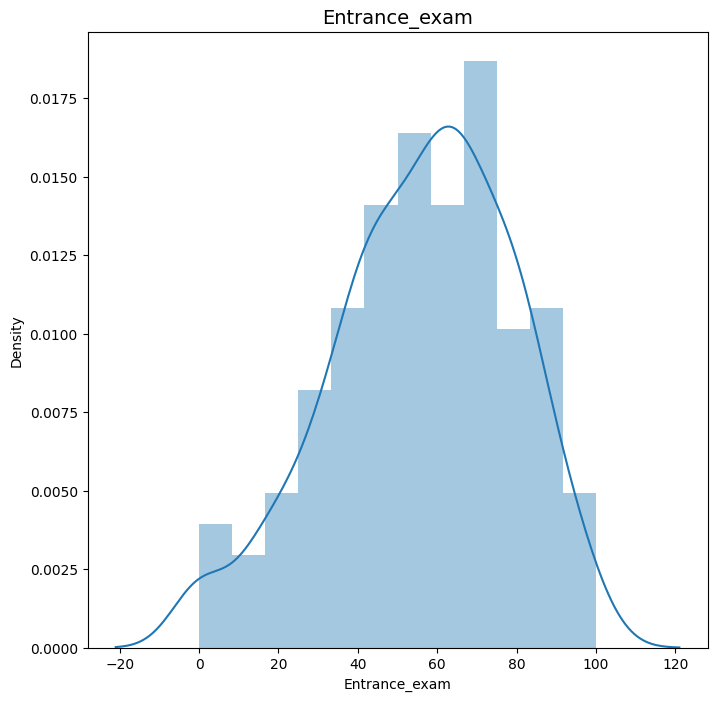

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


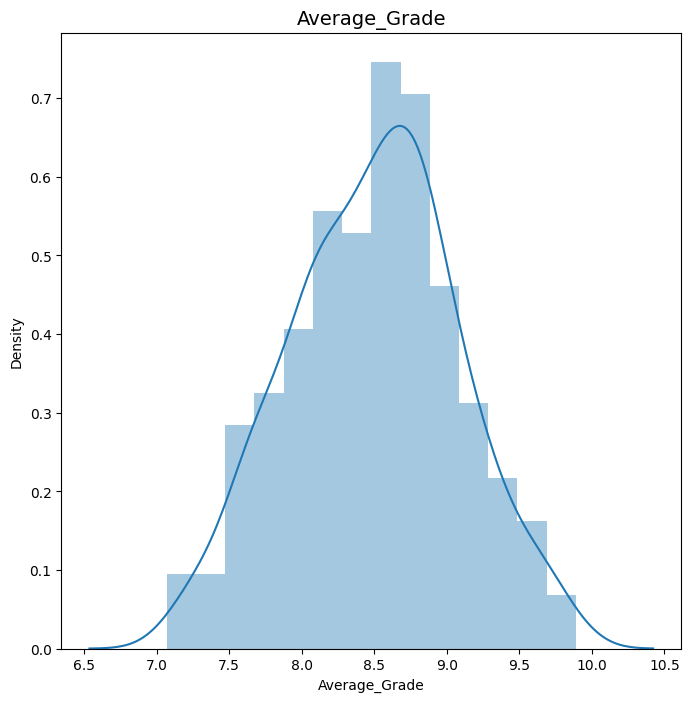

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


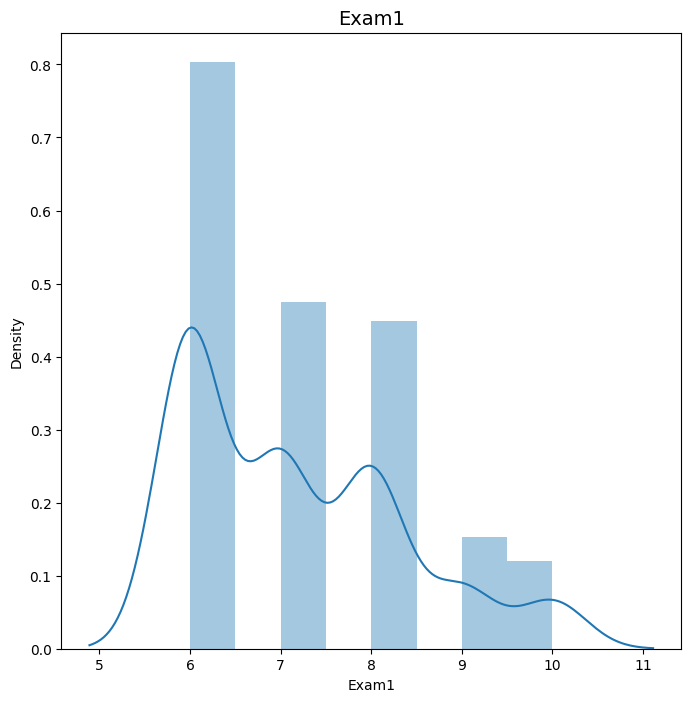

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


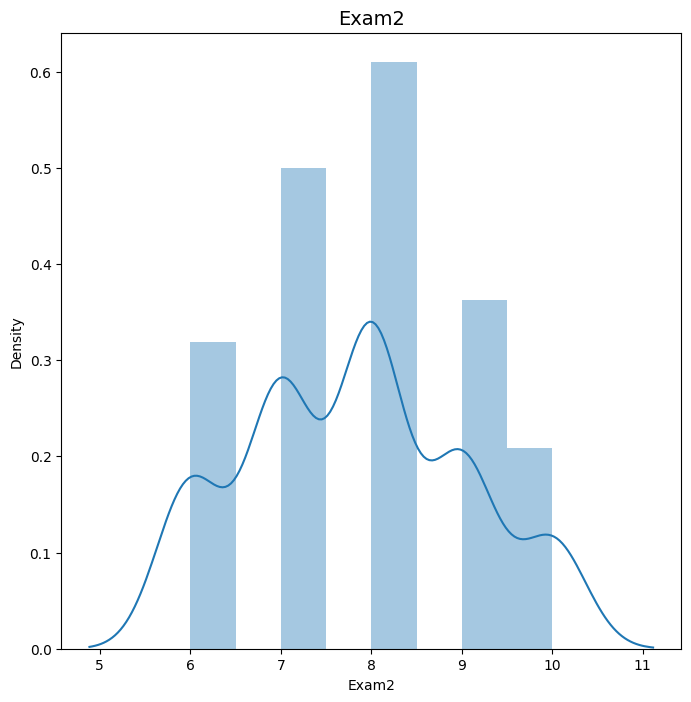

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


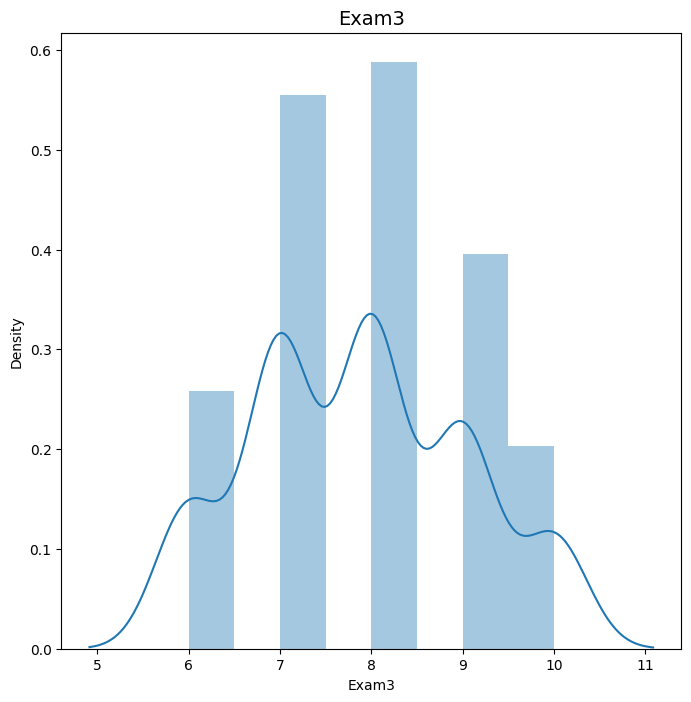

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


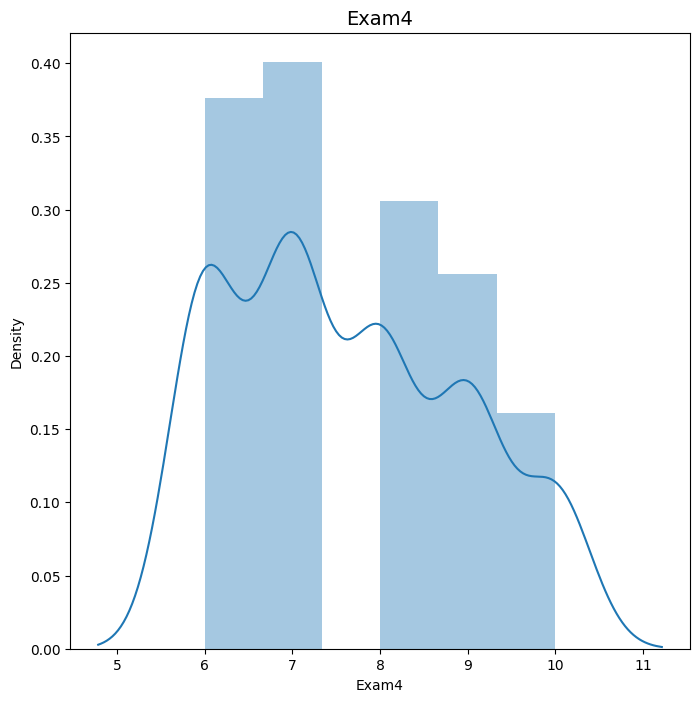

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


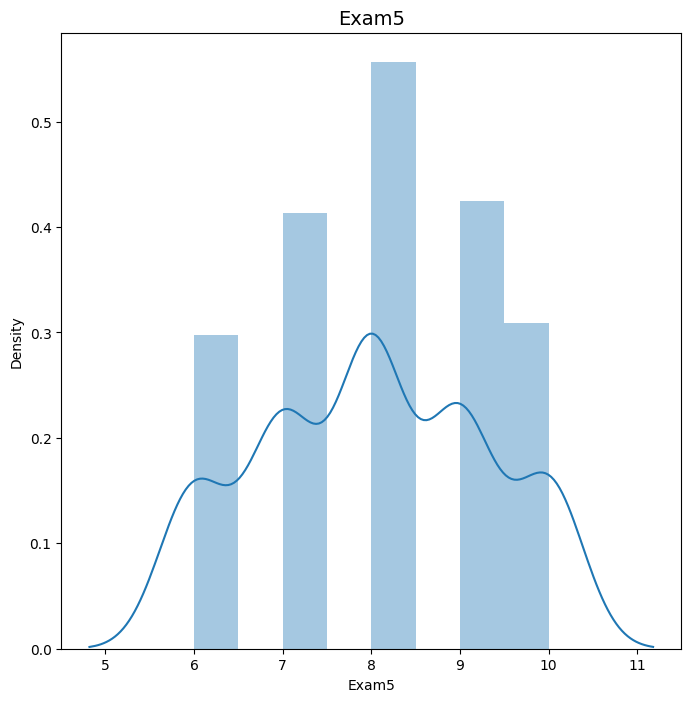

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


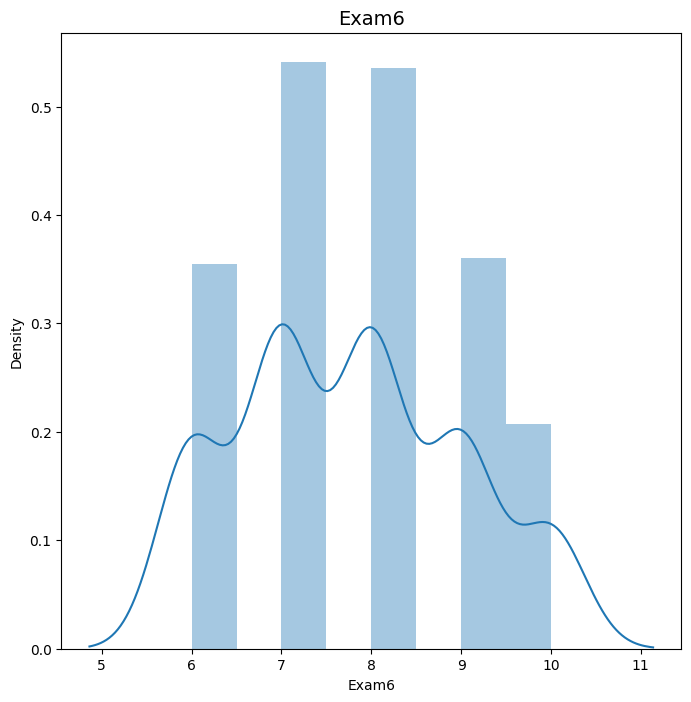

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


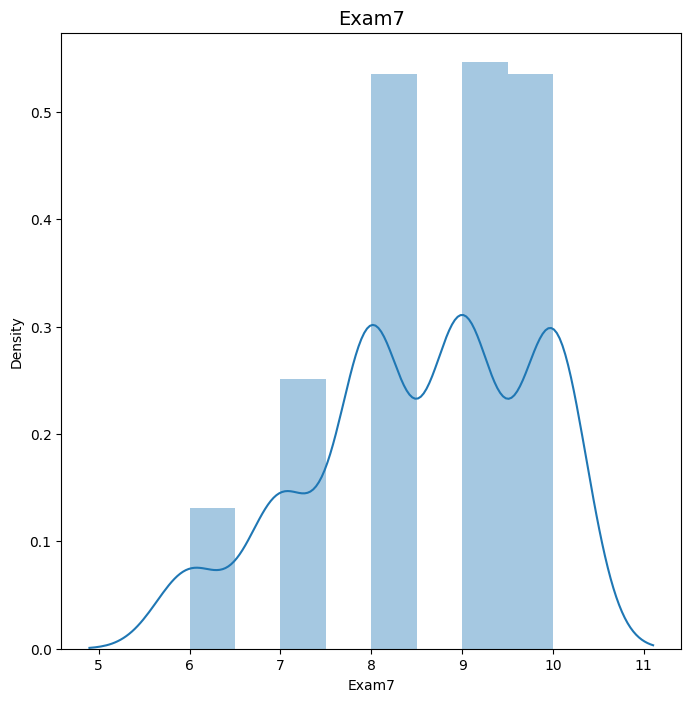

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


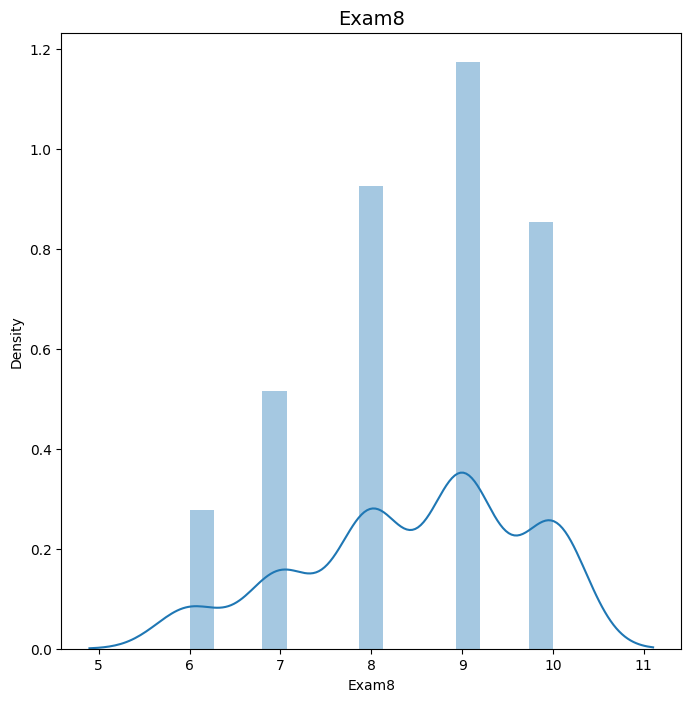

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


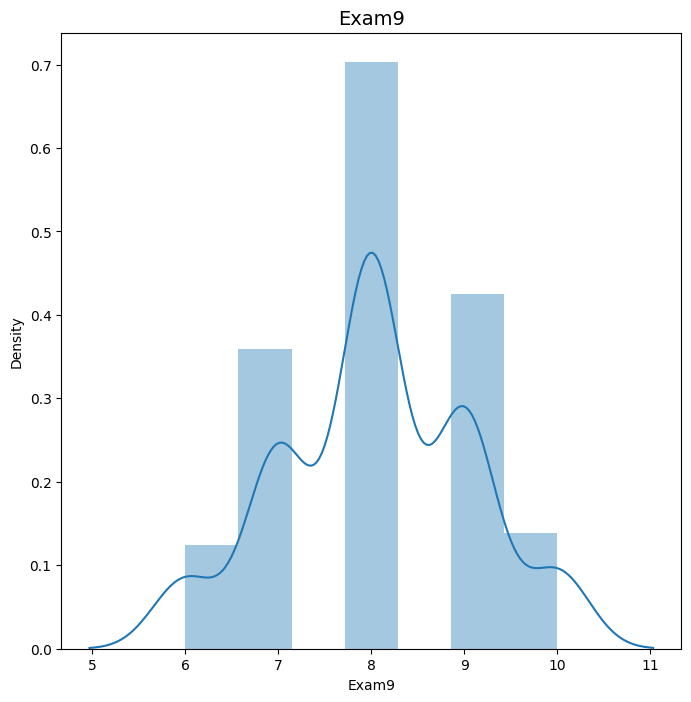

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


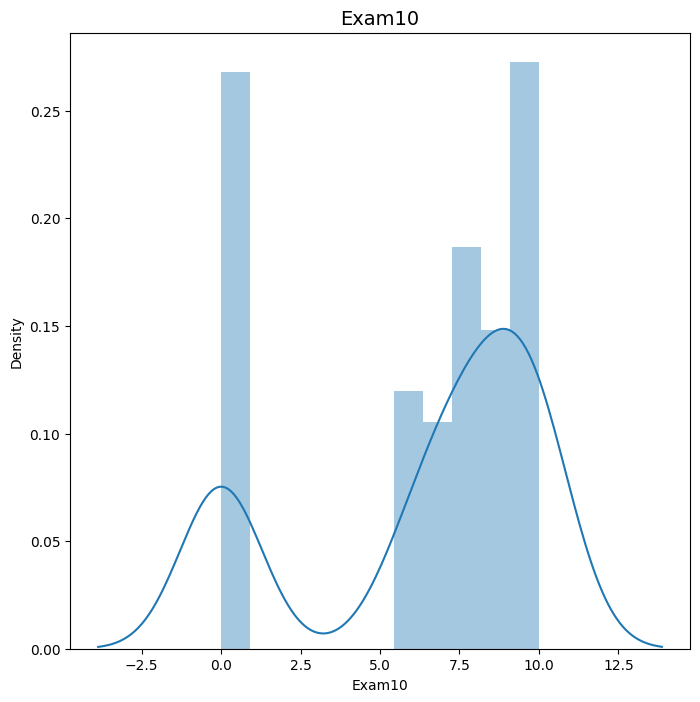

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


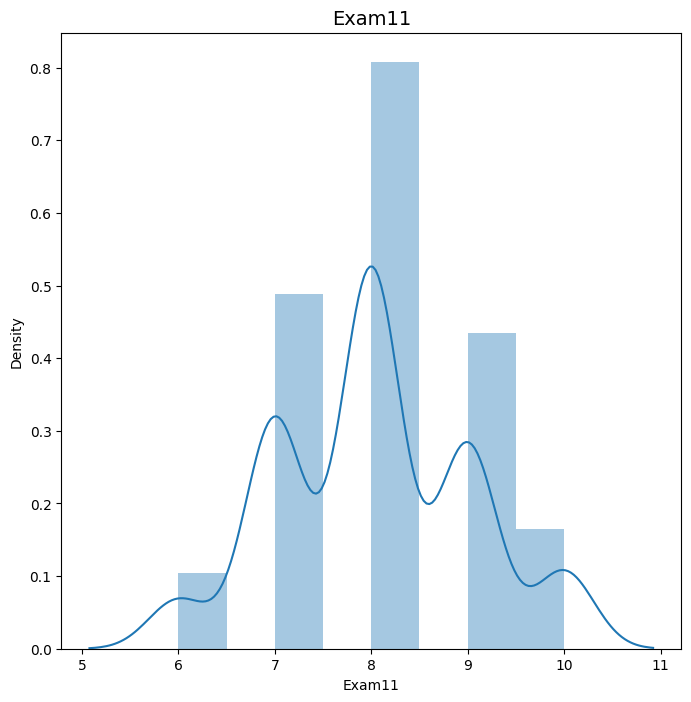

<ipython-input-14-177328c6b418>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean[feature])


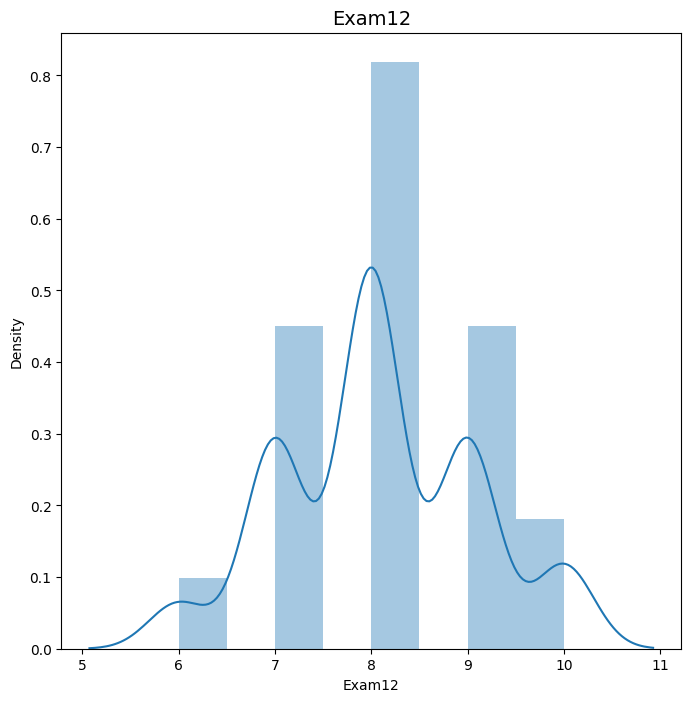

In [14]:
# Distribution Plot
for feature in Numerical_Columns:
    plt.figure(figsize=(8, 8))
    plt.title(feature,fontsize=14)
    sns.distplot(df_clean[feature])
    plt.show()

Entrance_exam vs Average_Grade


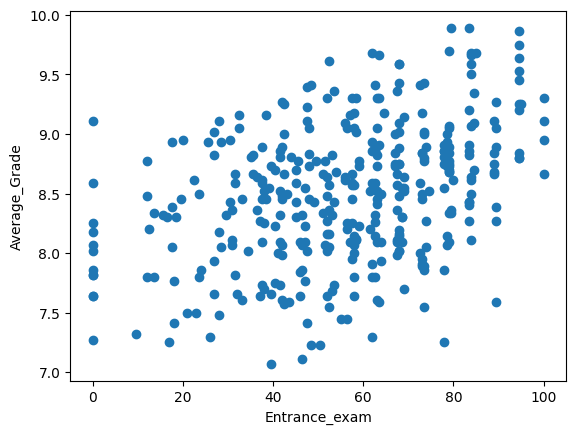



Entrance_exam vs Exam1


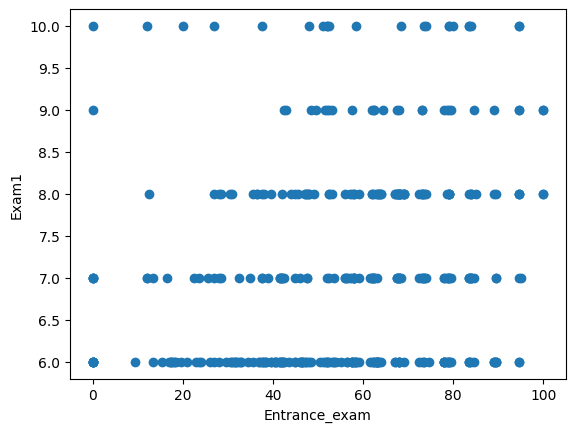



Entrance_exam vs Exam2


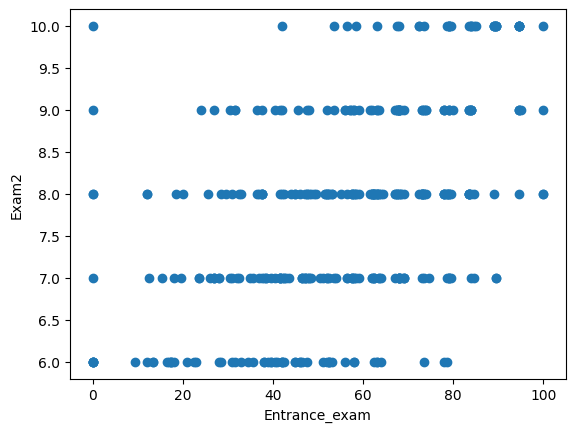



Entrance_exam vs Exam3


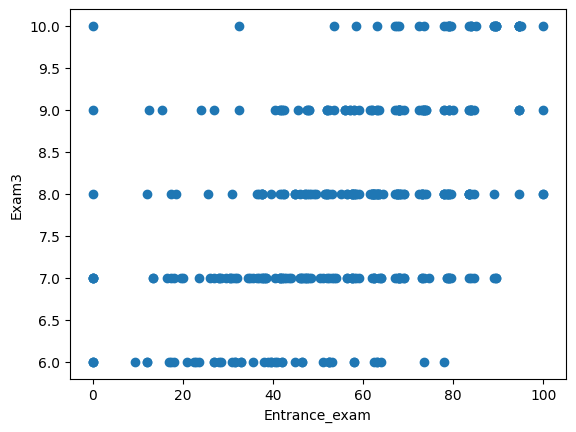



Entrance_exam vs Exam4


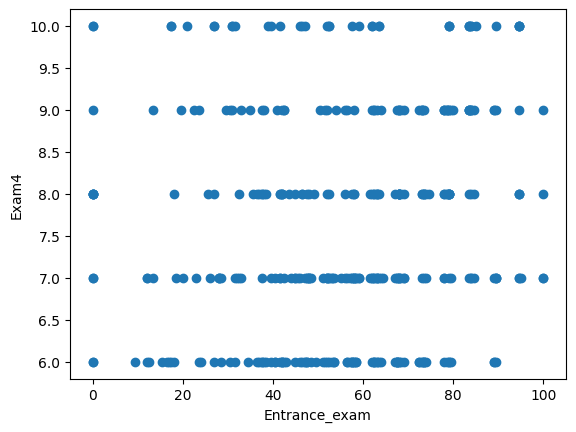



Entrance_exam vs Exam5


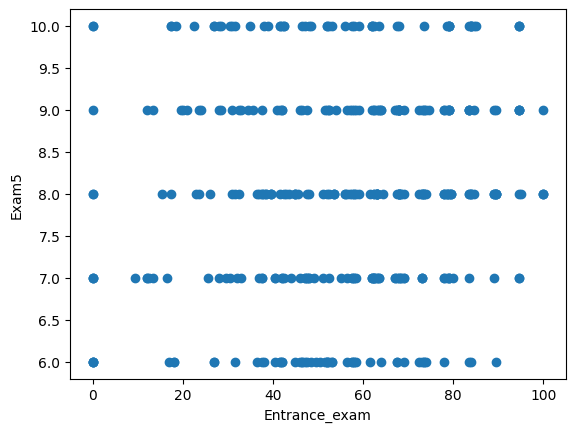



Entrance_exam vs Exam6


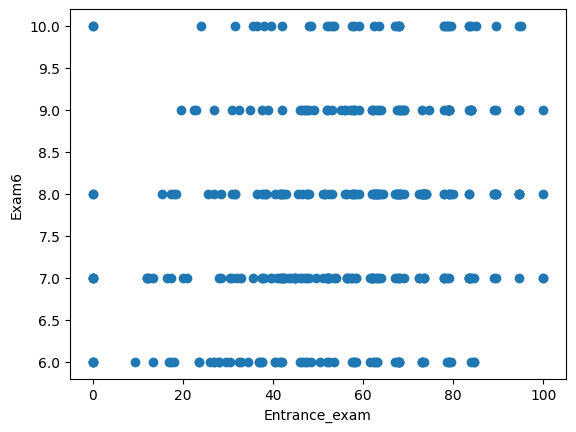



Entrance_exam vs Exam7


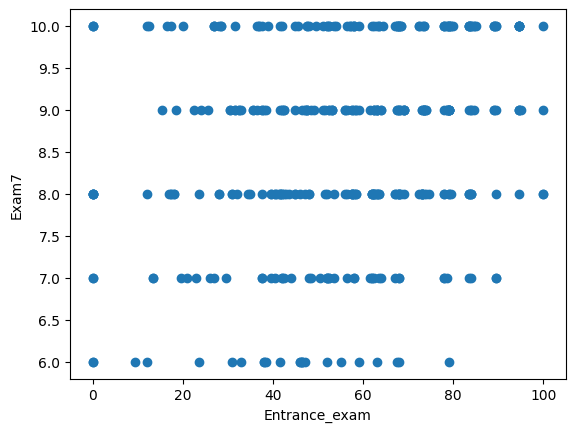



Entrance_exam vs Exam8


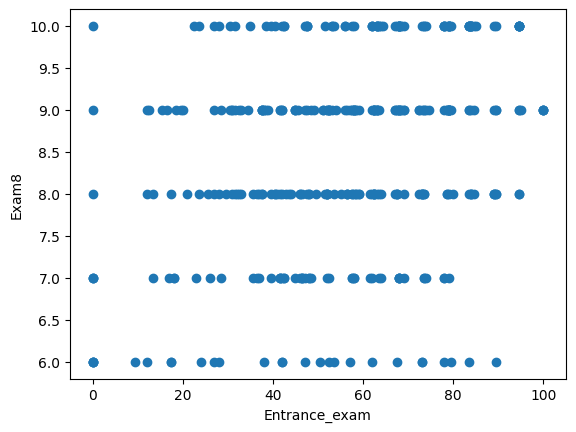



Entrance_exam vs Exam9


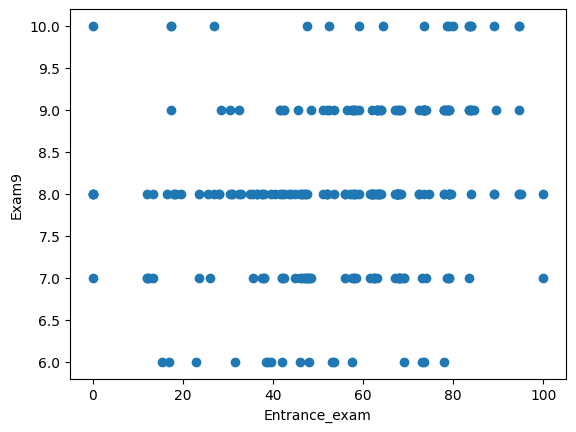



Entrance_exam vs Exam10


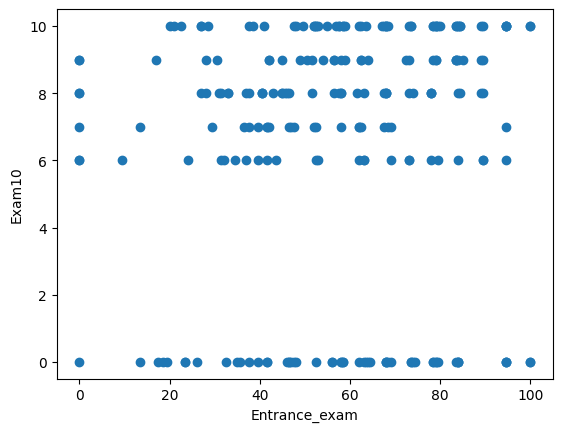



Entrance_exam vs Exam11


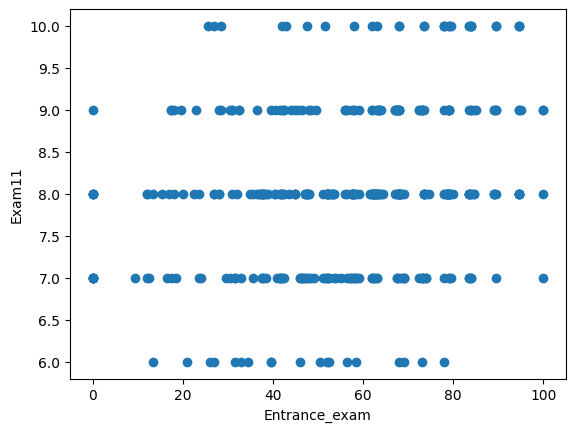



Entrance_exam vs Exam12


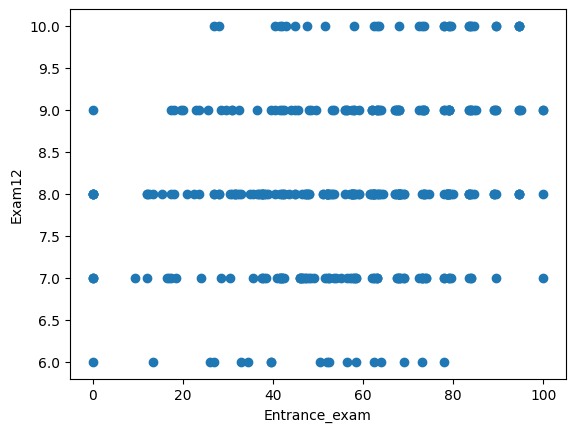



Average_Grade vs Exam1


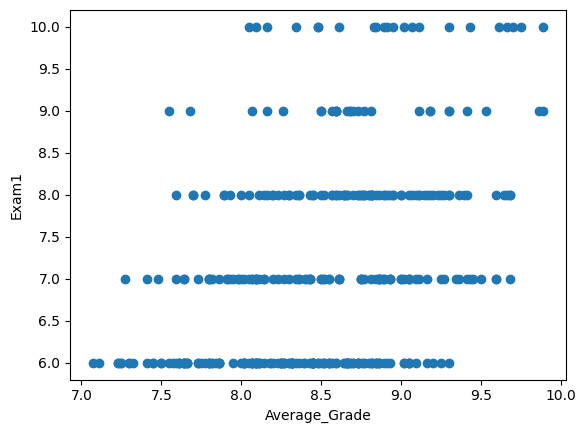



Average_Grade vs Exam2


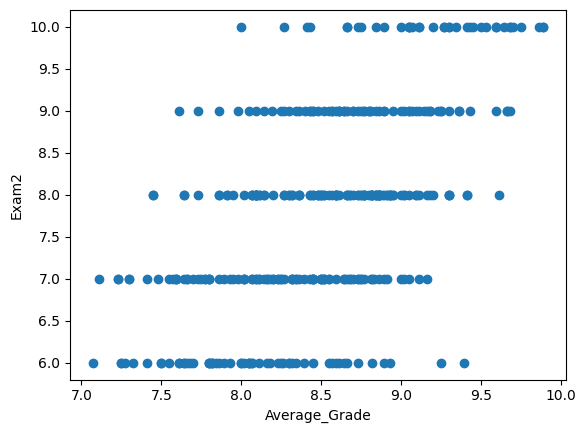



Average_Grade vs Exam3


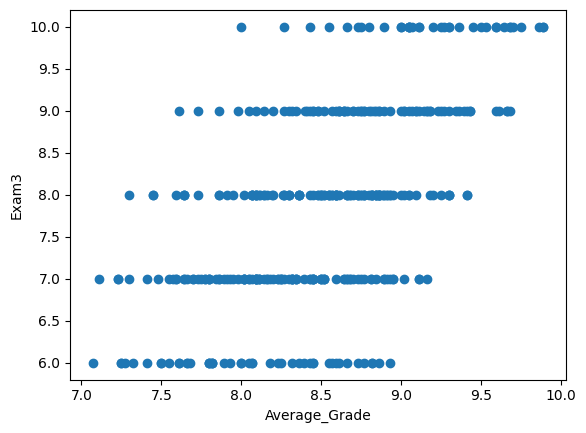



Average_Grade vs Exam4


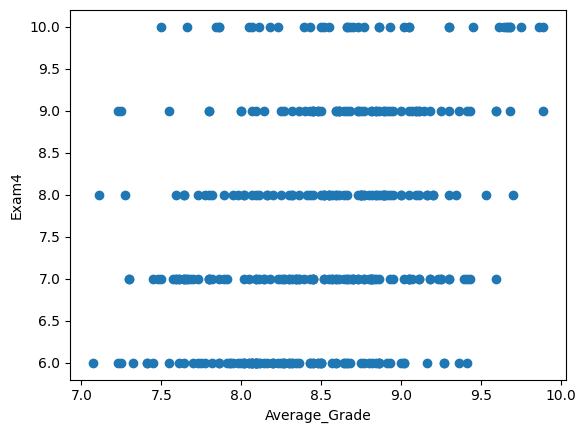



Average_Grade vs Exam5


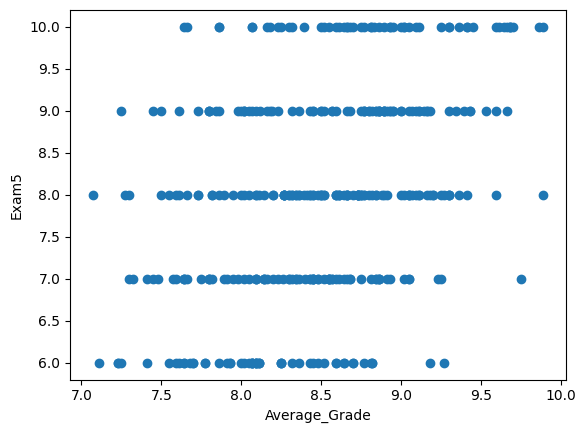



Average_Grade vs Exam6


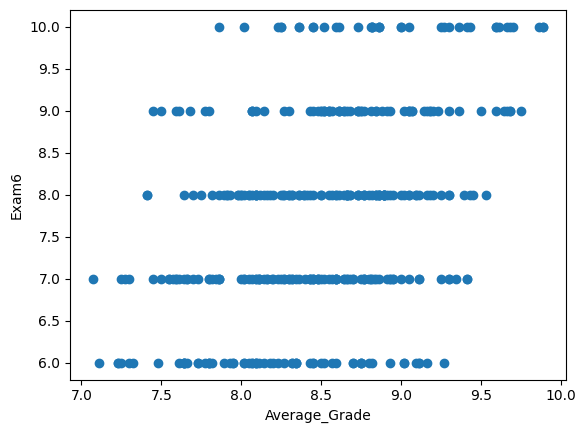



Average_Grade vs Exam7


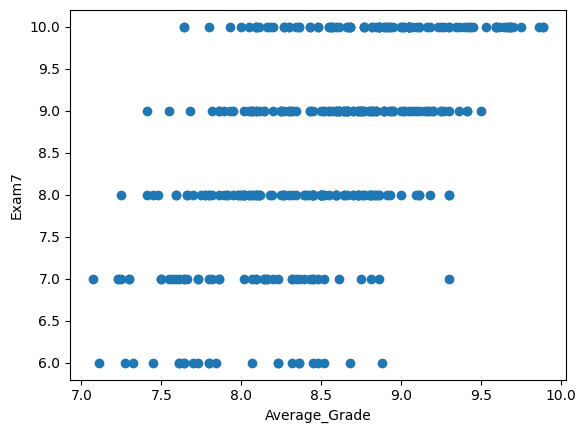



Average_Grade vs Exam8


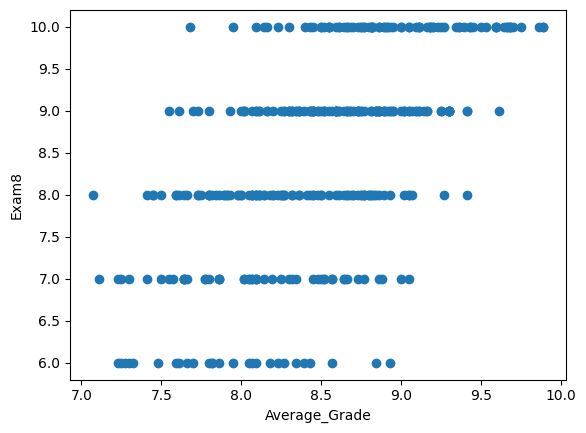



Average_Grade vs Exam9


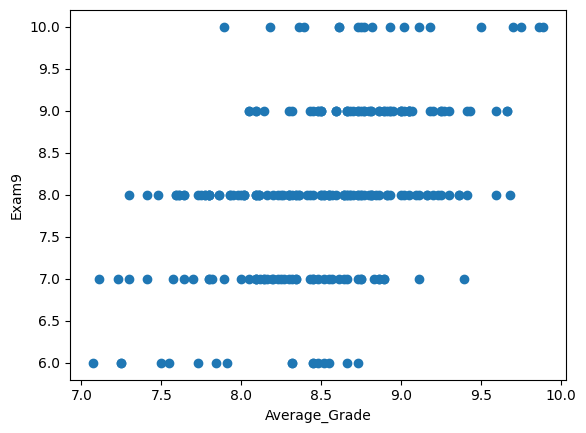



Average_Grade vs Exam10


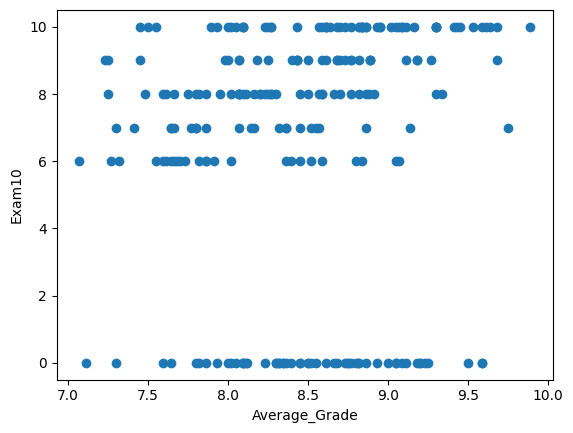



Average_Grade vs Exam11


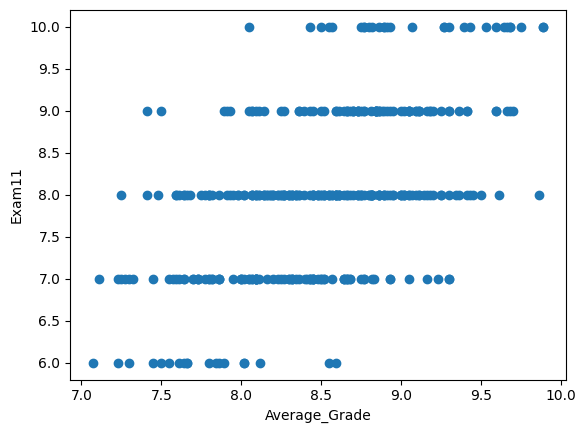



Average_Grade vs Exam12


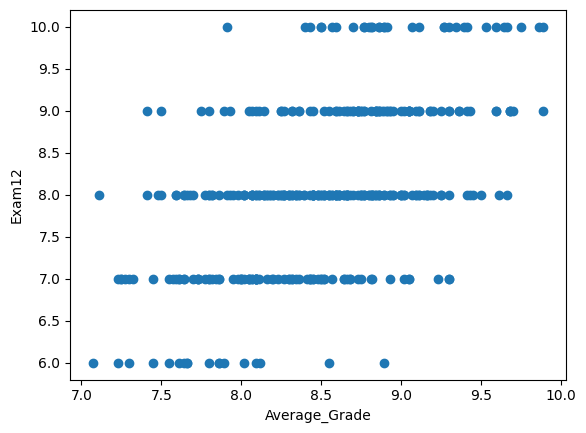



Exam1 vs Exam2


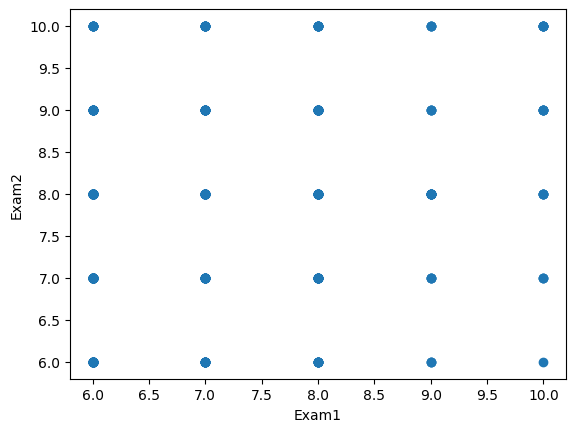



Exam1 vs Exam3


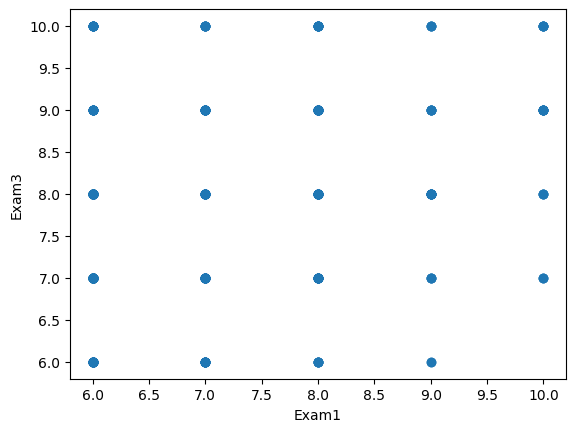



Exam1 vs Exam4


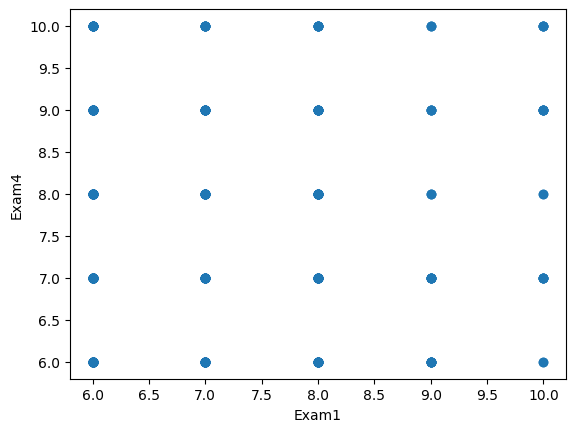



Exam1 vs Exam5


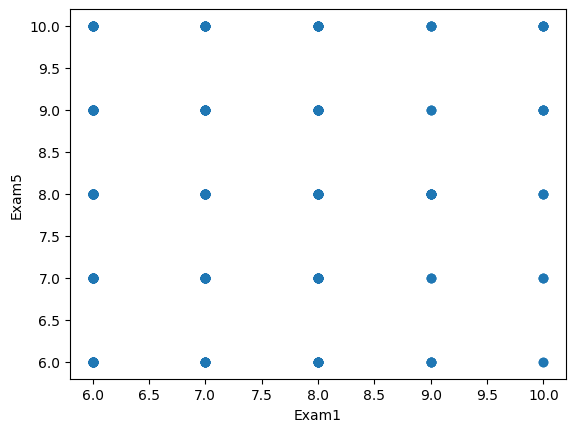



Exam1 vs Exam6


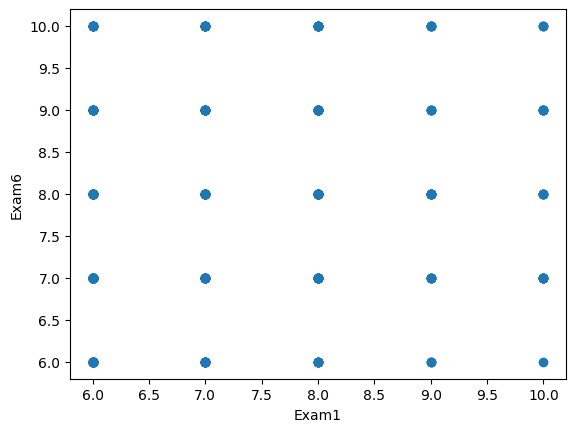



Exam1 vs Exam7


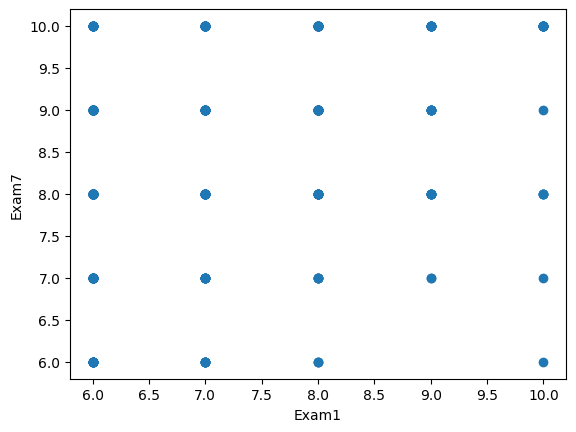



Exam1 vs Exam8


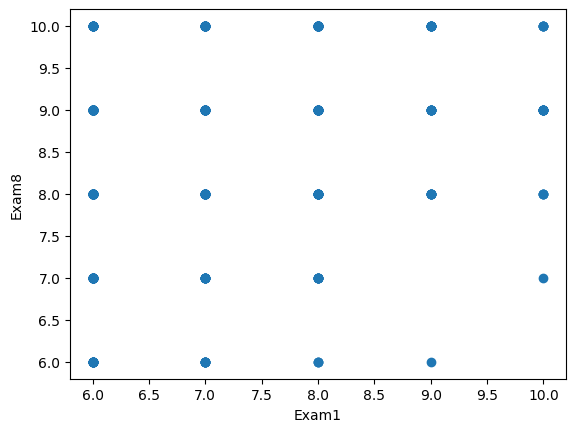



Exam1 vs Exam9


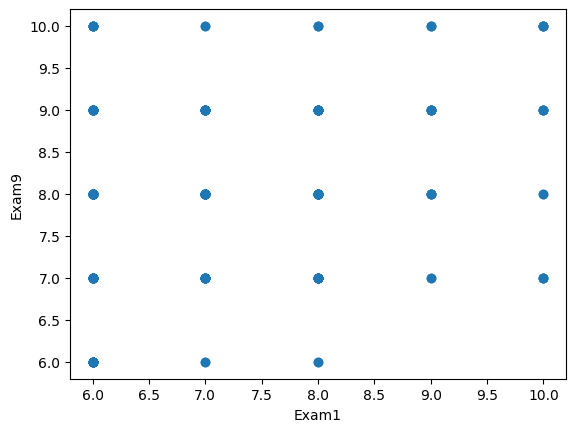



Exam1 vs Exam10


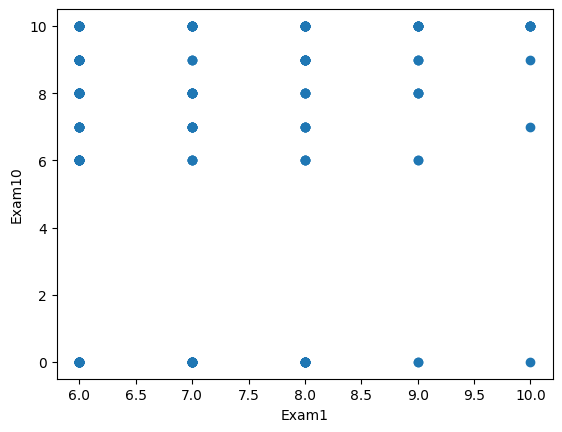



Exam1 vs Exam11


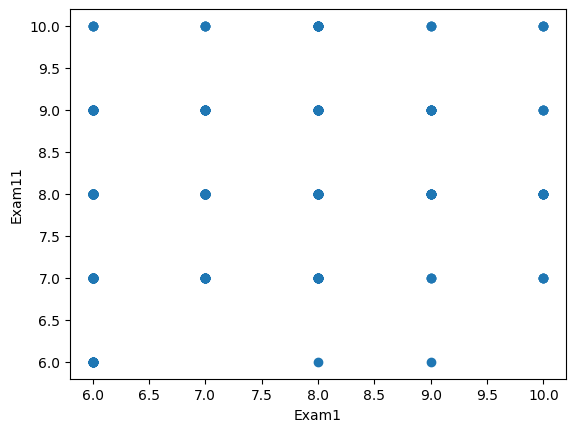



Exam1 vs Exam12


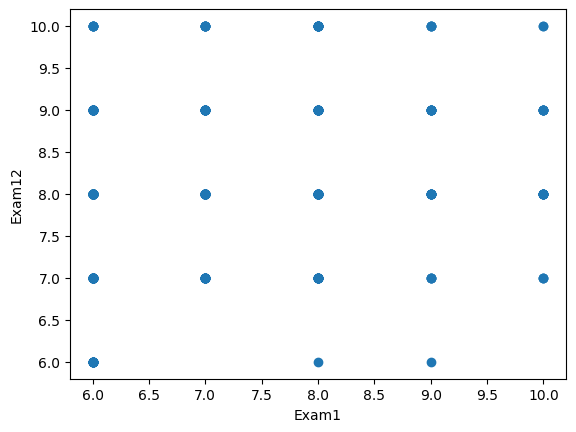



Exam2 vs Exam3


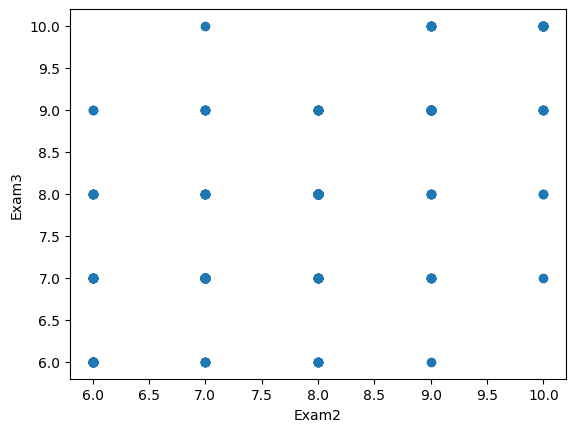



Exam2 vs Exam4


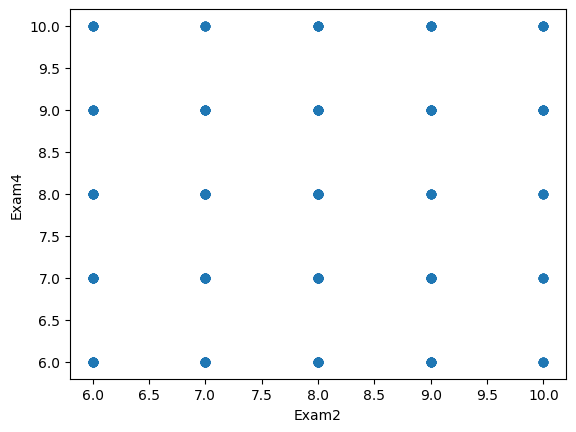



Exam2 vs Exam5


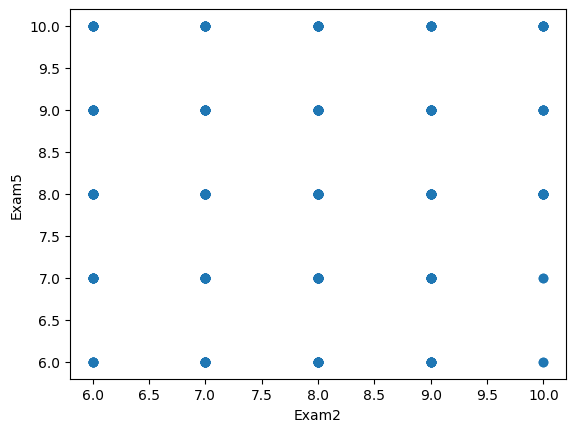



Exam2 vs Exam6


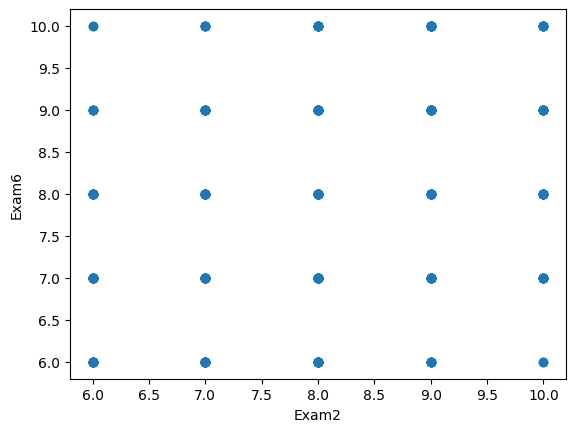



Exam2 vs Exam7


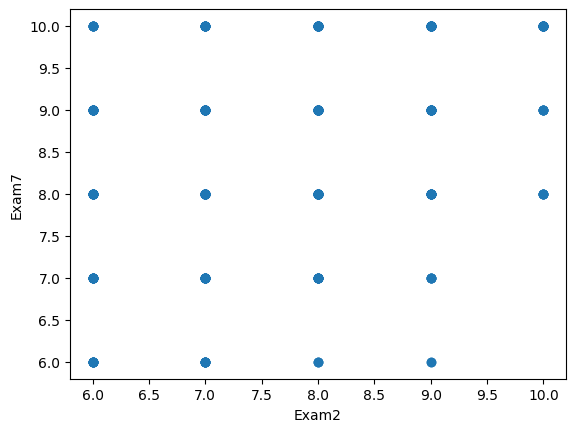



Exam2 vs Exam8


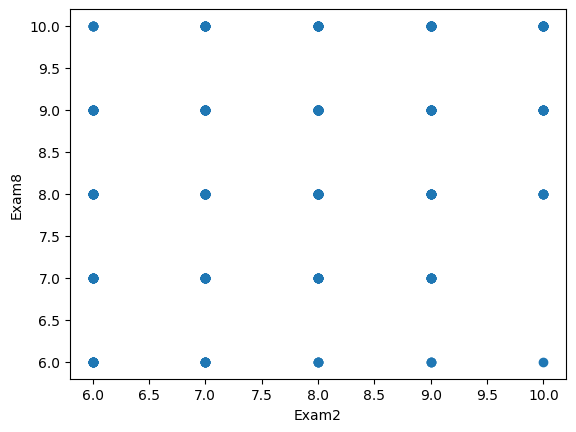



Exam2 vs Exam9


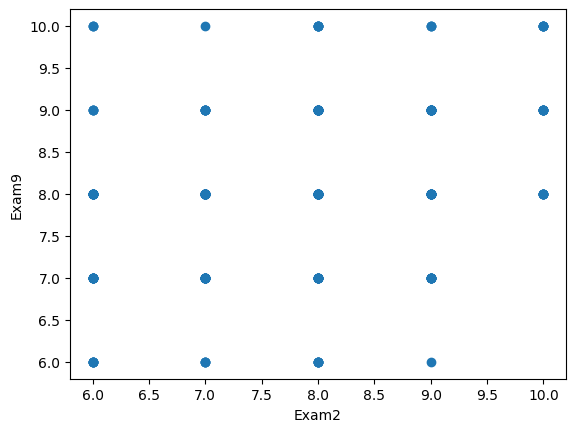



Exam2 vs Exam10


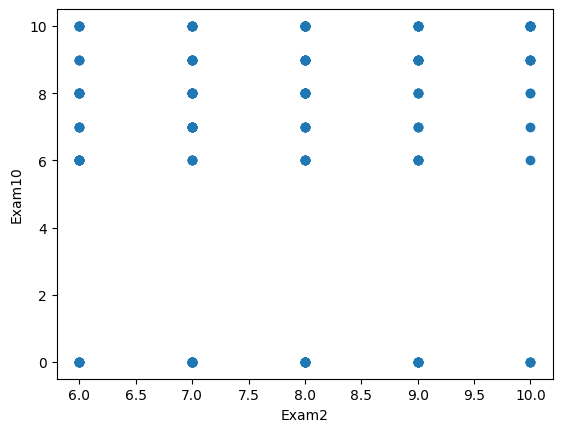



Exam2 vs Exam11


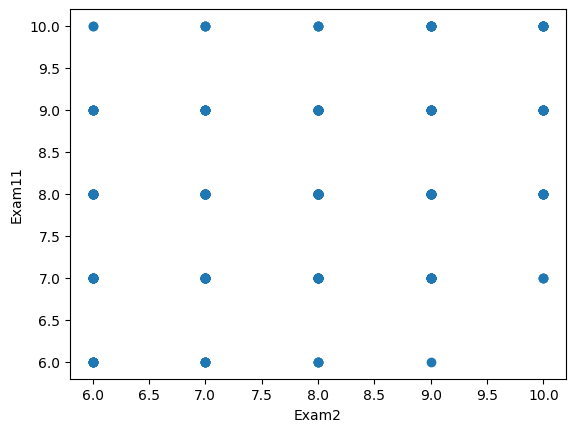



Exam2 vs Exam12


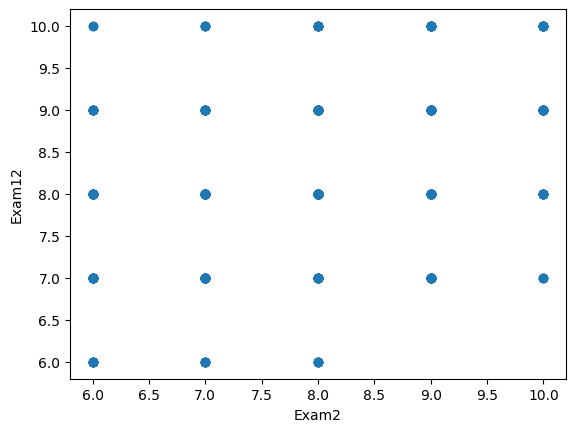



Exam3 vs Exam4


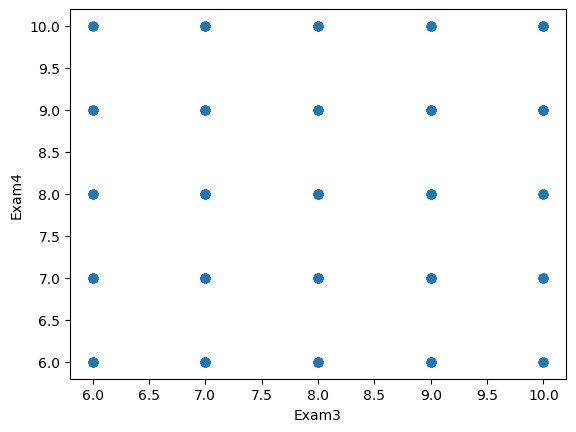



Exam3 vs Exam5


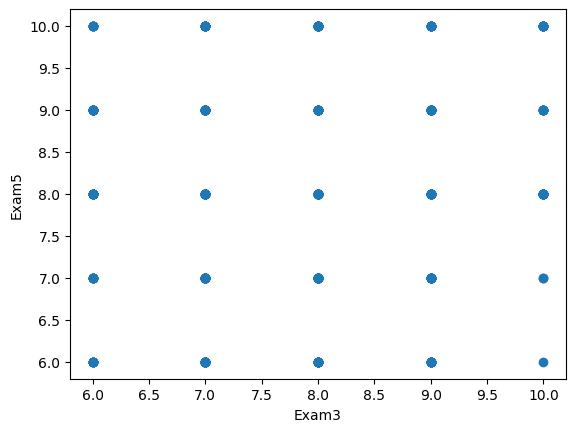



Exam3 vs Exam6


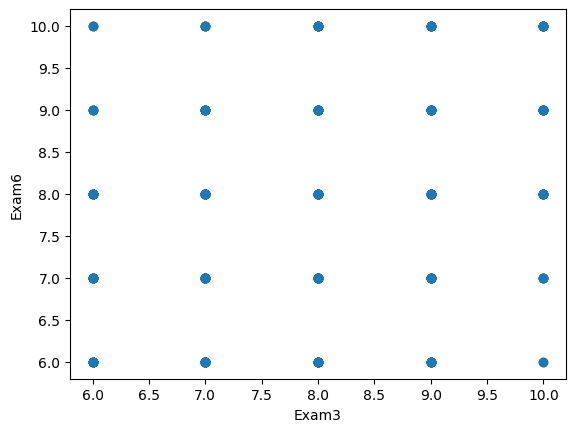



Exam3 vs Exam7


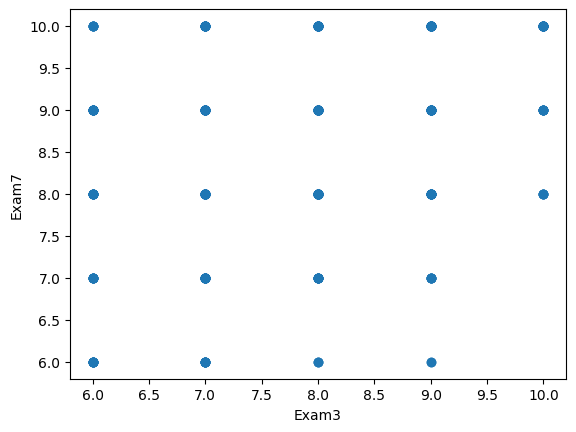



Exam3 vs Exam8


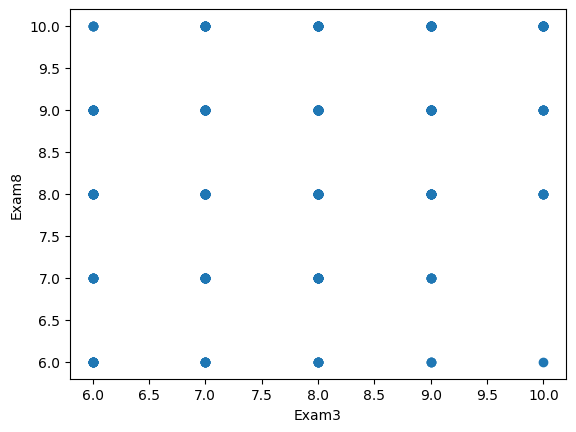



Exam3 vs Exam9


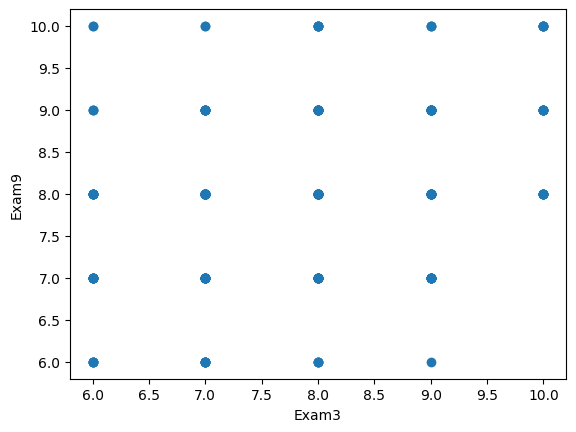



Exam3 vs Exam10


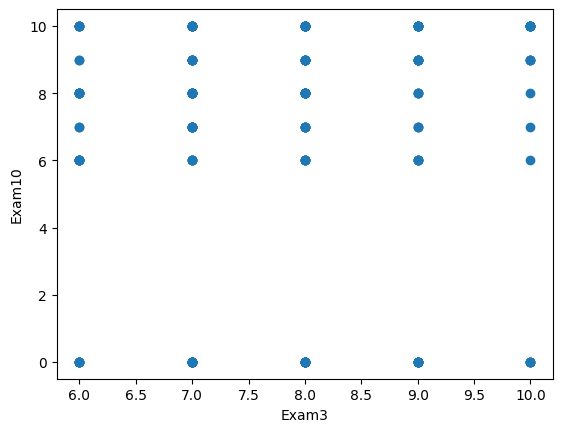



Exam3 vs Exam11


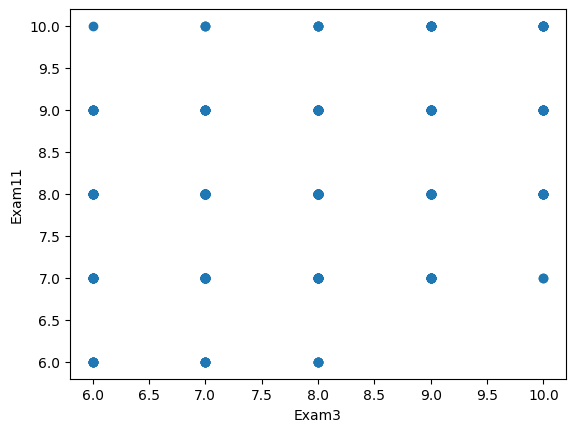



Exam3 vs Exam12


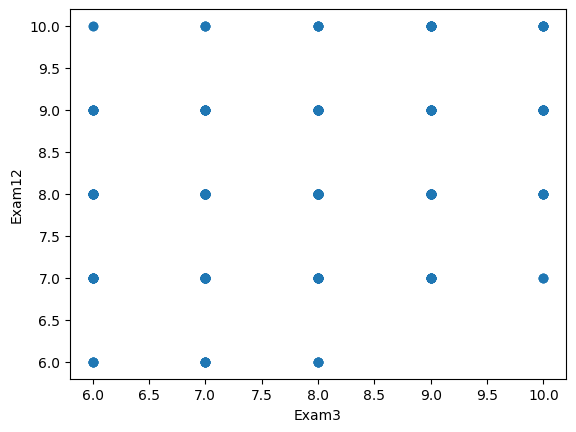



Exam4 vs Exam5


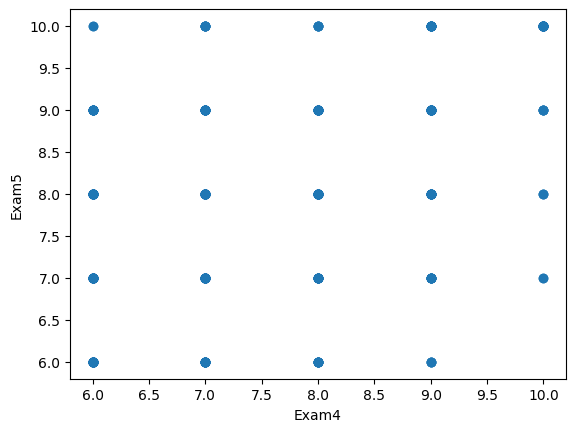



Exam4 vs Exam6


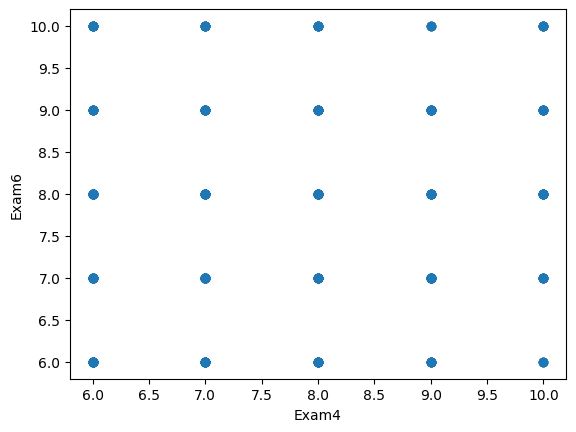



Exam4 vs Exam7


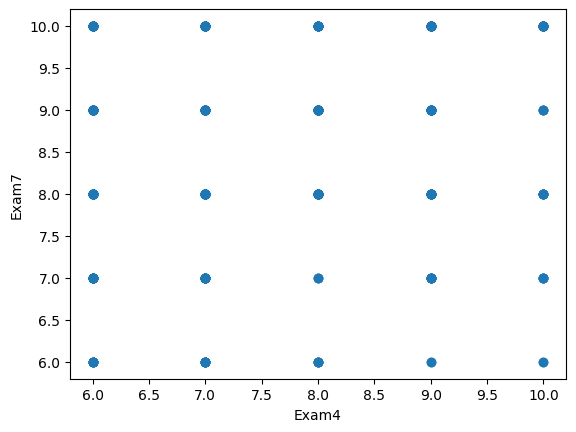



Exam4 vs Exam8


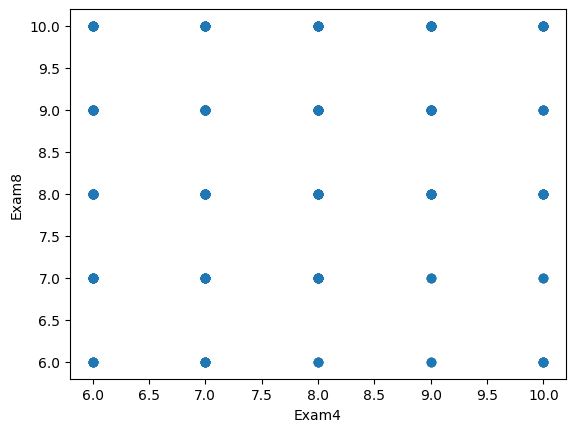



Exam4 vs Exam9


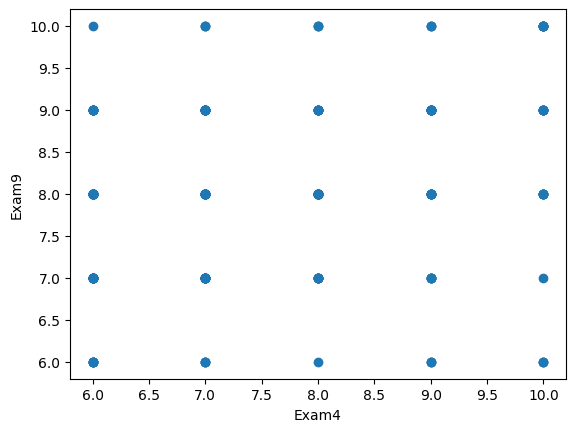



Exam4 vs Exam10


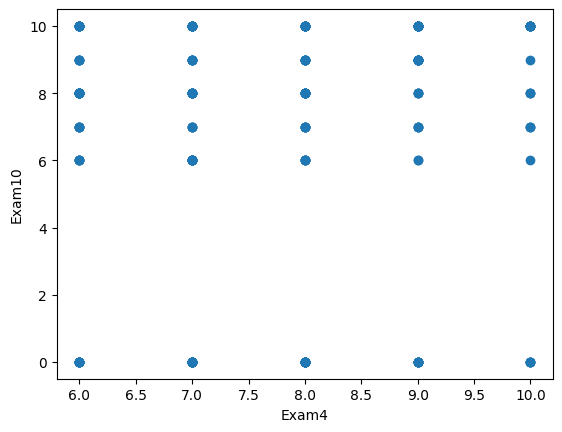



Exam4 vs Exam11


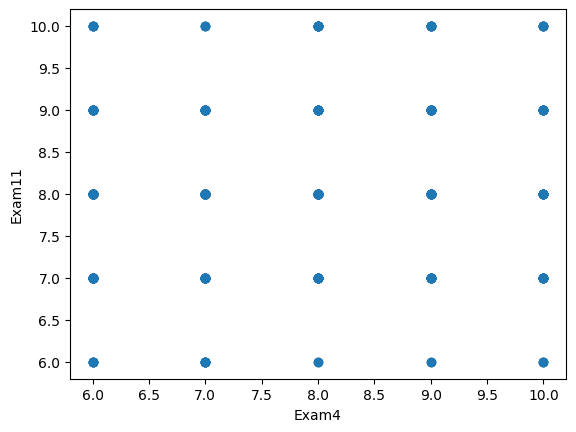



Exam4 vs Exam12


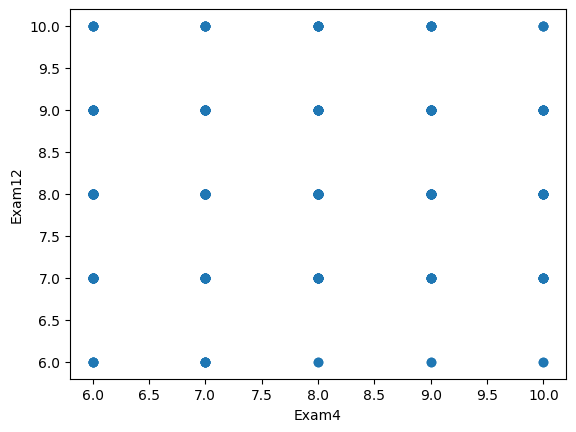



Exam5 vs Exam6


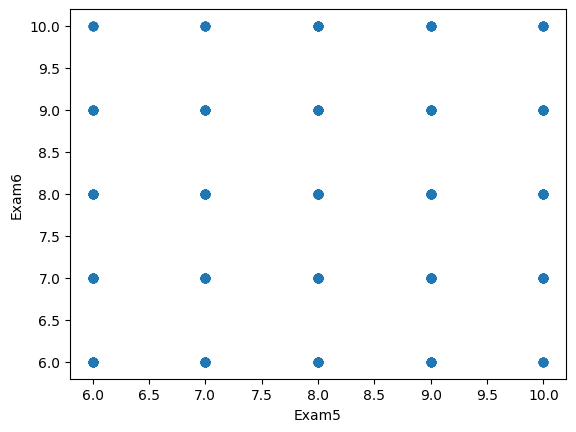



Exam5 vs Exam7


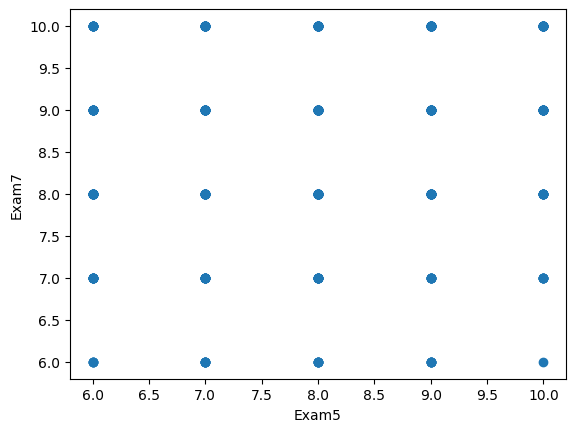



Exam5 vs Exam8


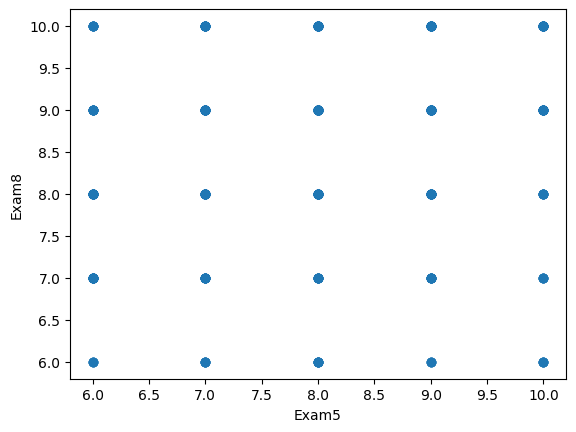



Exam5 vs Exam9


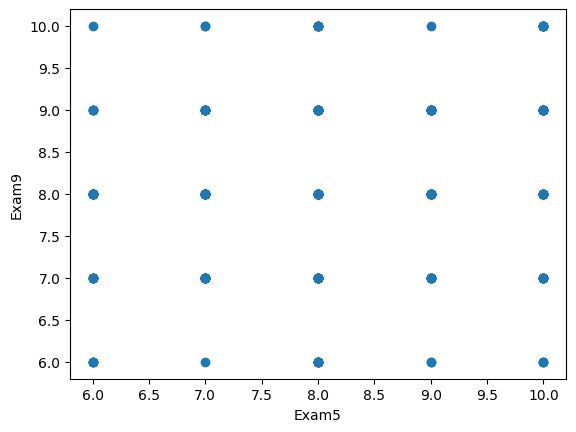



Exam5 vs Exam10


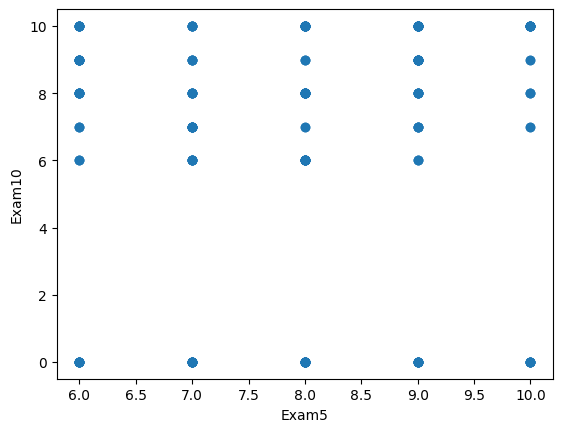



Exam5 vs Exam11


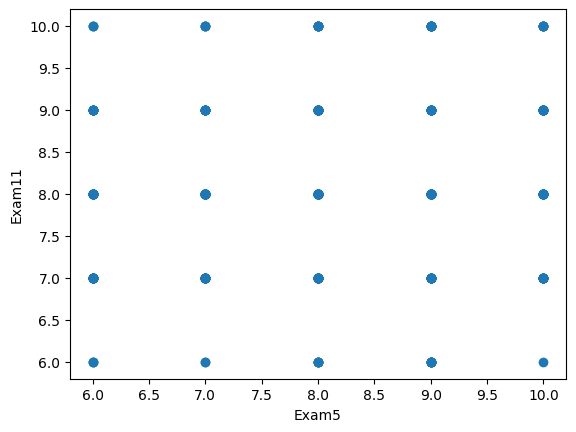



Exam5 vs Exam12


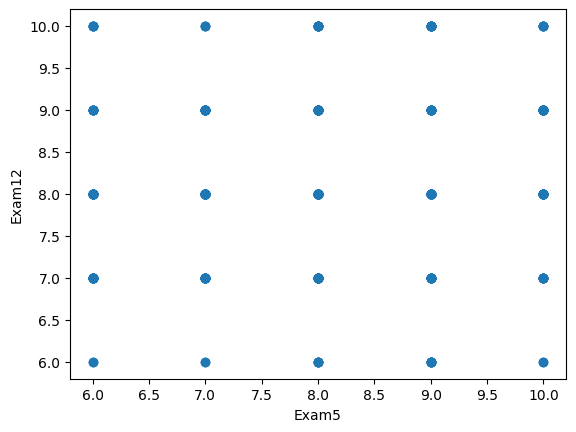



Exam6 vs Exam7


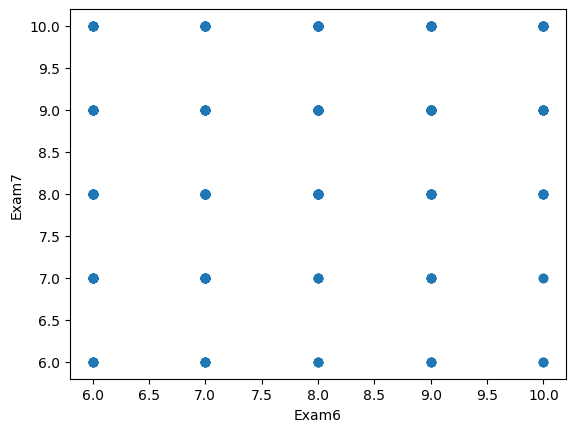



Exam6 vs Exam8


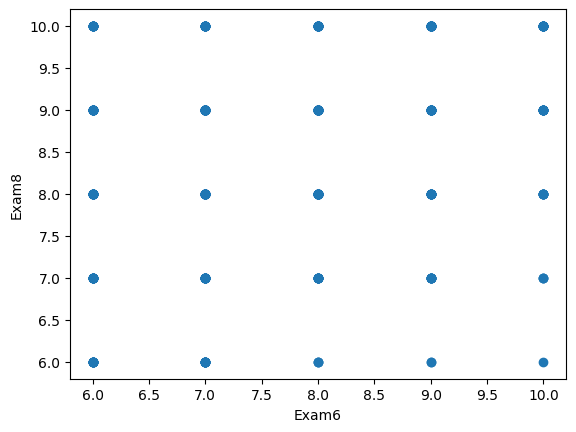



Exam6 vs Exam9


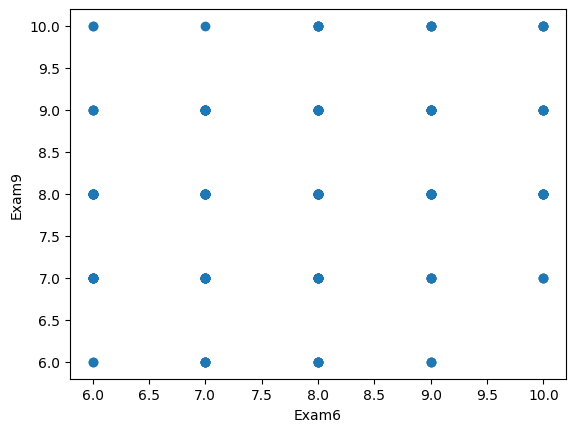



Exam6 vs Exam10


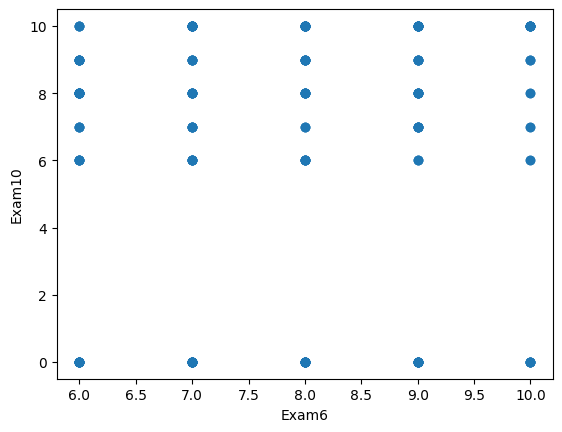



Exam6 vs Exam11


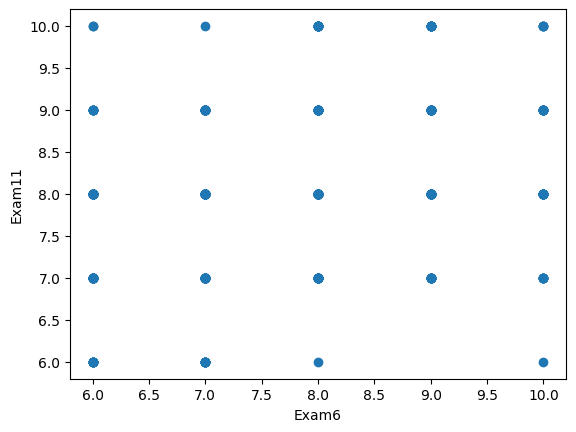



Exam6 vs Exam12


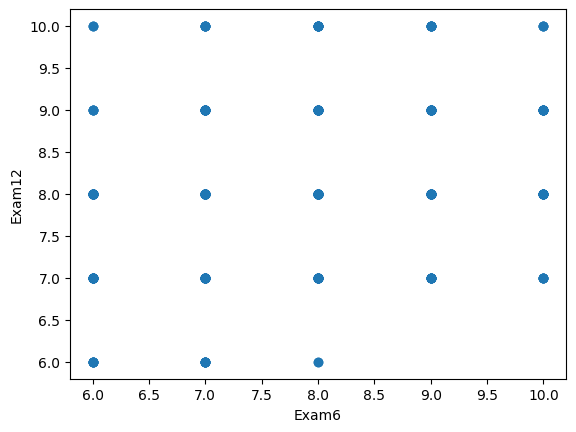



Exam7 vs Exam8


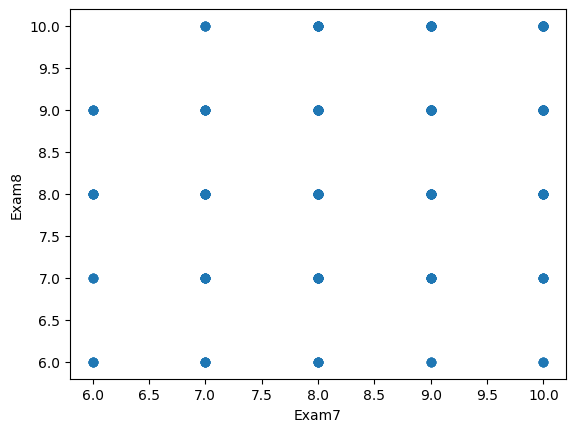



Exam7 vs Exam9


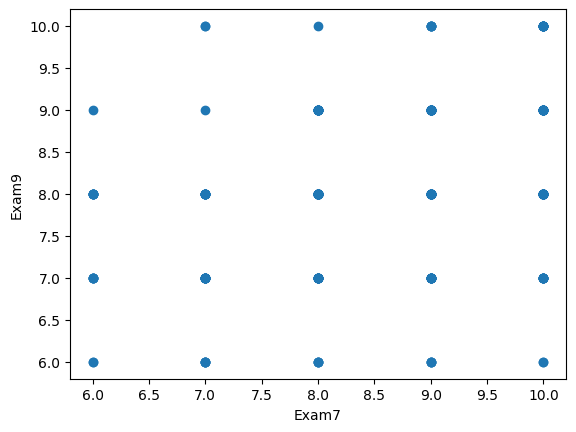



Exam7 vs Exam10


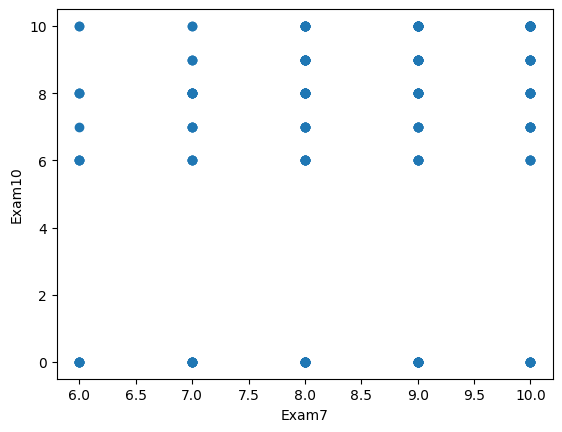



Exam7 vs Exam11


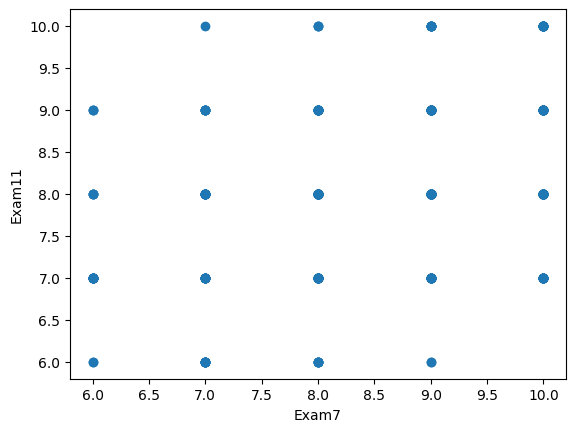



Exam7 vs Exam12


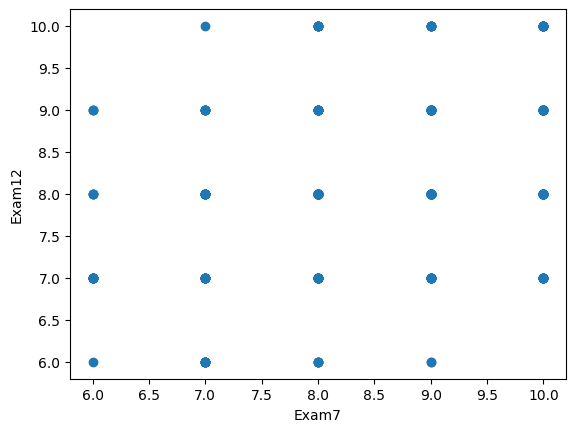



Exam8 vs Exam9


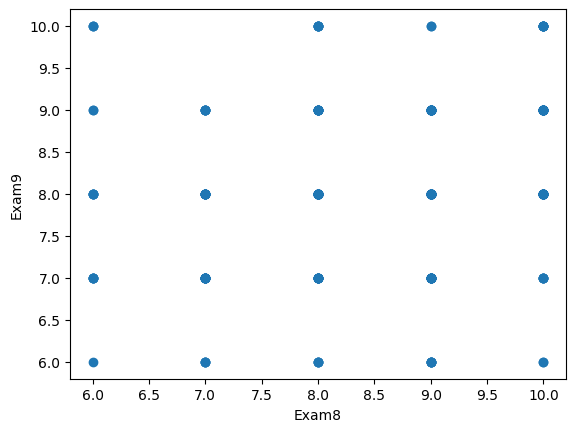



Exam8 vs Exam10


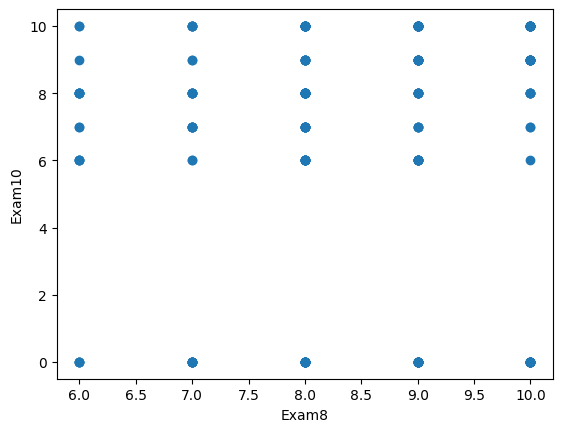



Exam8 vs Exam11


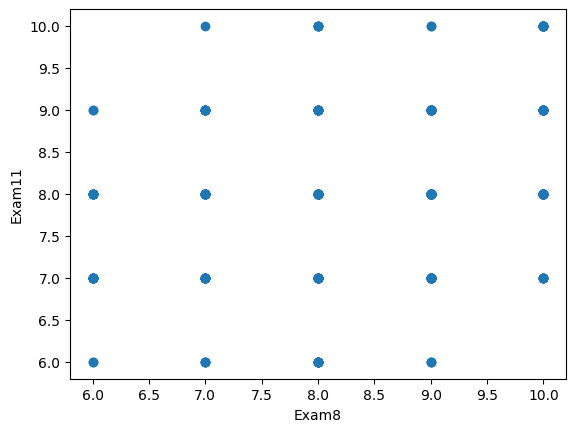



Exam8 vs Exam12


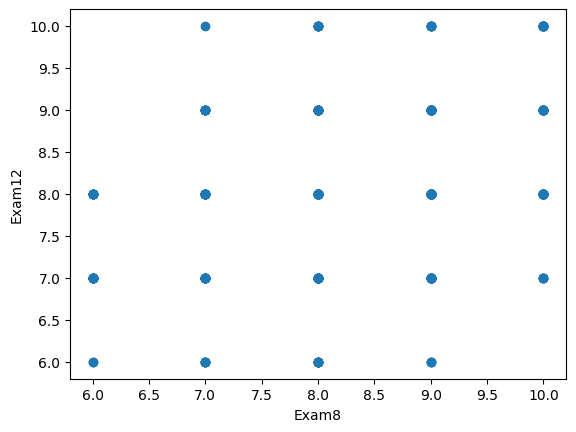



Exam9 vs Exam10


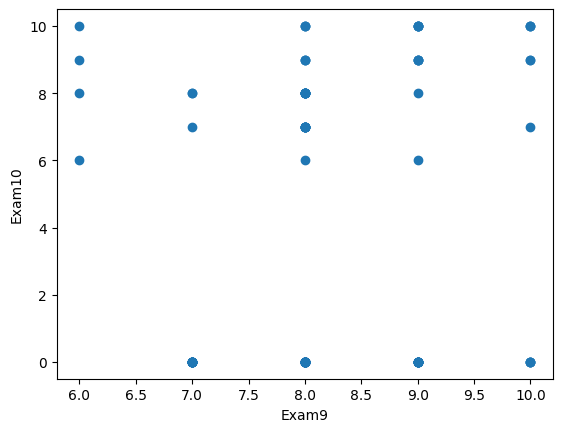



Exam9 vs Exam11


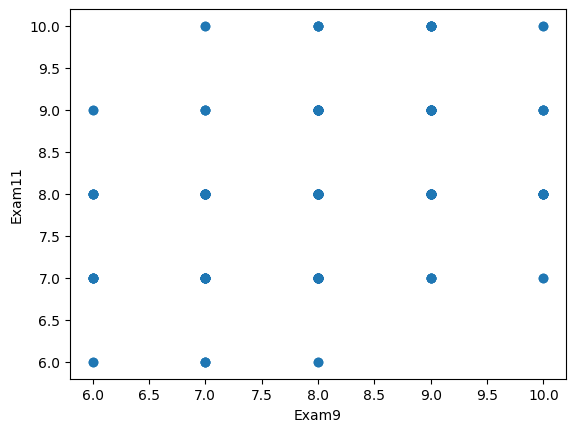



Exam9 vs Exam12


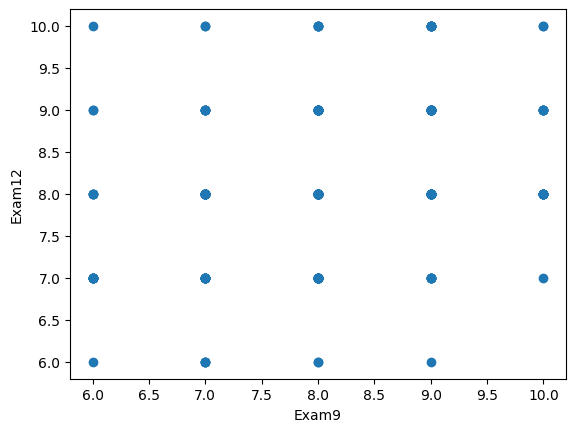



Exam10 vs Exam11


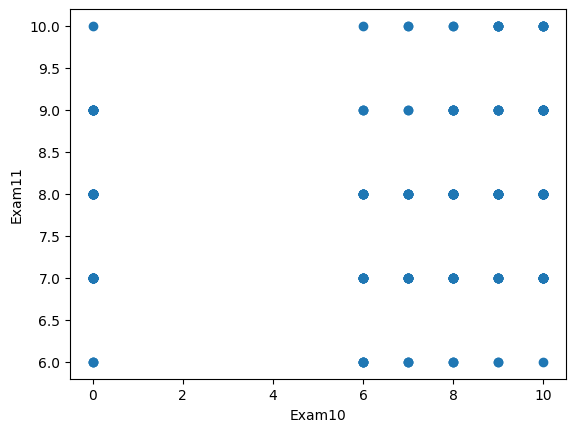



Exam10 vs Exam12


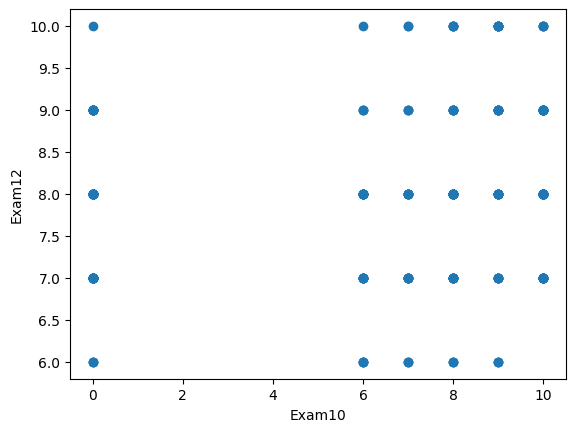



Exam11 vs Exam12


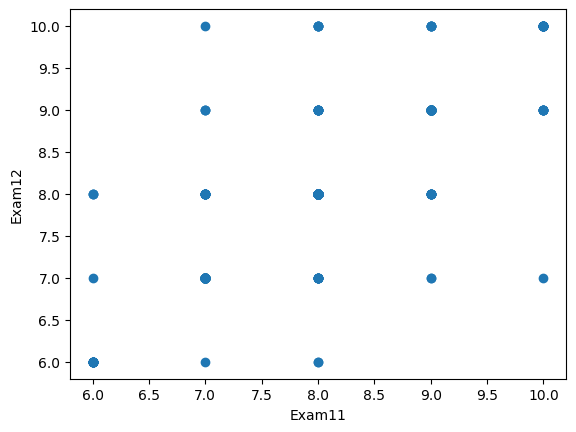

In [15]:
# Scatter Plot
# For each pair of numerical variables, construct a scatter plot of the variables.
temp = []
for i in Numerical_Columns:
  for j in Numerical_Columns:
    if (i == j): continue
    temp.append(i)
    if (j in temp): continue
    print(i, "vs", j)
    plt.xlabel(i)
    plt.ylabel(j)
    plt.scatter(x=df_clean[i], y=df_clean[j])
    plt.show()
    print("\n")

##**Categorical Columns**

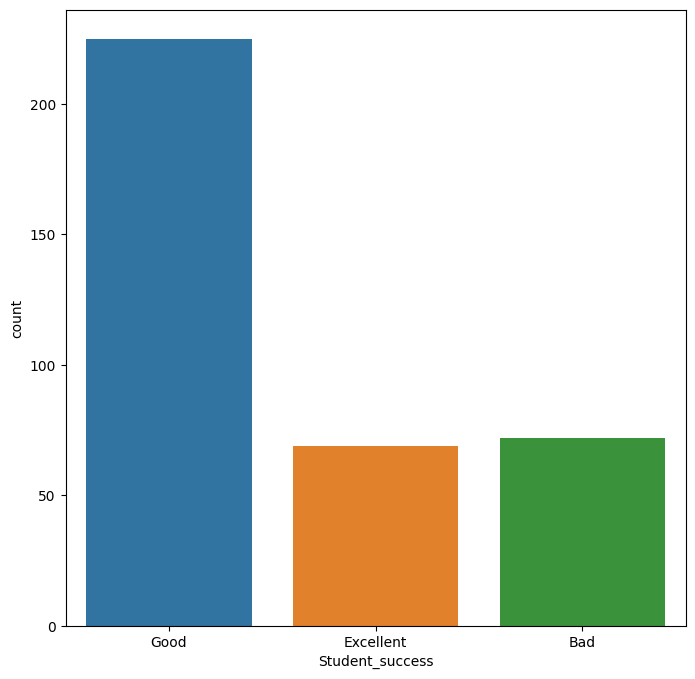

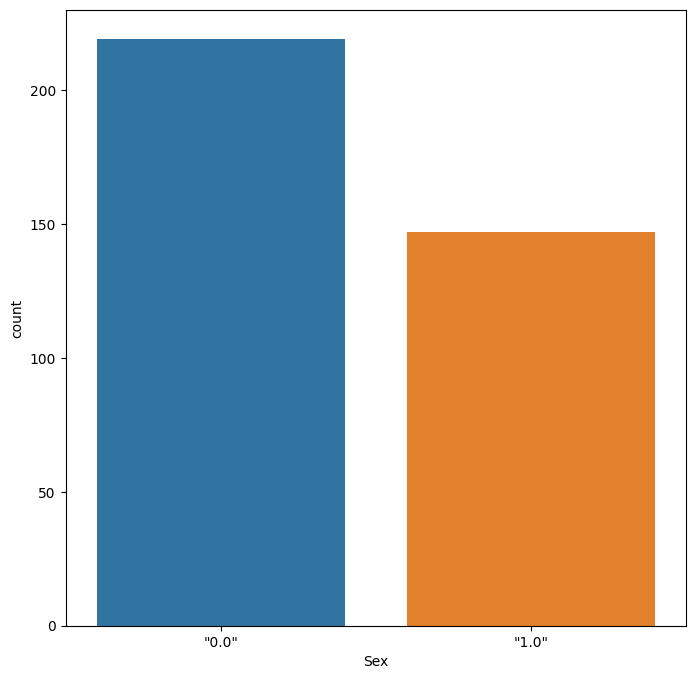

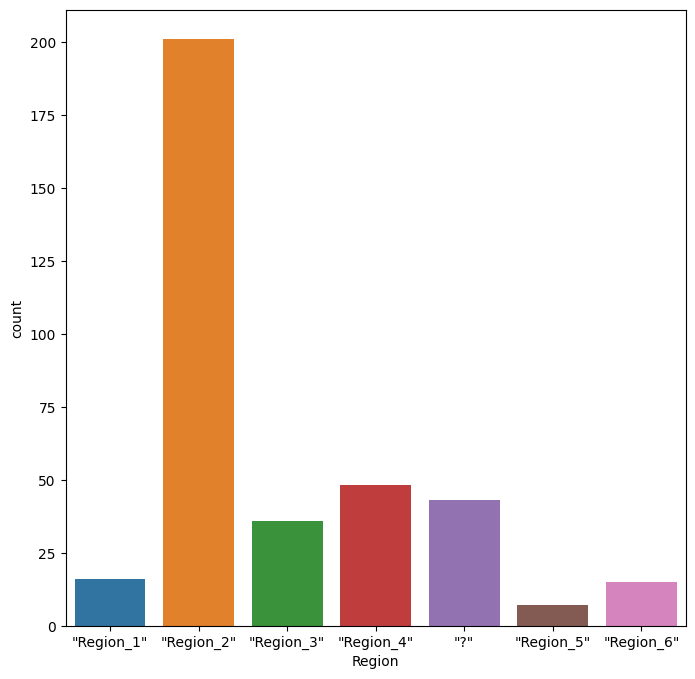

In [16]:
# Categorical Columns
for feature in Categorical_Columns:
  plt.figure(figsize=(8,8))
  sns.countplot(x = feature, data = df_clean)
  plt.show()
  print()

#**2) Pre-process the dataset**

In [17]:
# Removing Double Qoutes from the values in the dataset

# Function to remove double quotes and convert to float for "Sex" column
def process_sex_column(value):
    return float(value.strip('"'))

# Function to remove double quotes for "Region" column
def process_region_column(value):
    return value.strip('"')

# Apply the functions to the respective columns
df_clean['Sex'] = df_clean['Sex'].apply(process_sex_column)
df_clean['Region'] = df_clean['Region'].apply(process_region_column)

df_clean.head(5)

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
0,Good,0.0,100.0,8.66,Region_1,8.0,8.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0,0.0,7.0,7.0
1,Good,1.0,100.0,8.95,Region_2,8.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,NaN,10.0,8.0,8.0
2,Excellent,0.0,100.0,9.11,Region_3,9.0,9.0,9.0,7.0,8.0,7.0,8.0,9.0,7.0,0.0,9.0,9.0
3,Excellent,0.0,100.0,9.30,Region_2,9.0,10.0,10.0,9.0,8.0,7.0,10.0,9.0,NaN,10.0,9.0,9.0
4,Excellent,0.0,94.5,9.45,Region_2,7.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0


In [18]:
# Checking for "?" values
(df_clean == '?').sum(axis=0) #axis = 0 for column

Student_success     0
Sex                 0
Entrance_exam       0
Average_Grade       0
Region             43
Exam1               0
Exam2               0
Exam3               0
Exam4               0
Exam5               0
Exam6               0
Exam7               0
Exam8               0
Exam9               0
Exam10              0
Exam11              0
Exam12              0
dtype: int64

In [19]:
# Replace ค่า "?" ด้วย NaN
df_clean.replace('?', np.NaN, inplace=True)

In [20]:
# Checking Null values
print(df_clean.isnull().any())
print("\n")
print(df_clean.isnull().sum())

Student_success    False
Sex                False
Entrance_exam      False
Average_Grade      False
Region              True
Exam1              False
Exam2               True
Exam3               True
Exam4               True
Exam5               True
Exam6              False
Exam7              False
Exam8               True
Exam9               True
Exam10              True
Exam11              True
Exam12              True
dtype: bool


Student_success      0
Sex                  0
Entrance_exam        0
Average_Grade        0
Region              43
Exam1                0
Exam2                2
Exam3                2
Exam4                3
Exam5                3
Exam6                0
Exam7                0
Exam8                2
Exam9              127
Exam10             136
Exam11               2
Exam12               2
dtype: int64


In [21]:
# Replace ค่า NaN ใน region column ด้วย other
df_clean.Region.replace(np.NaN, "other", inplace=True)

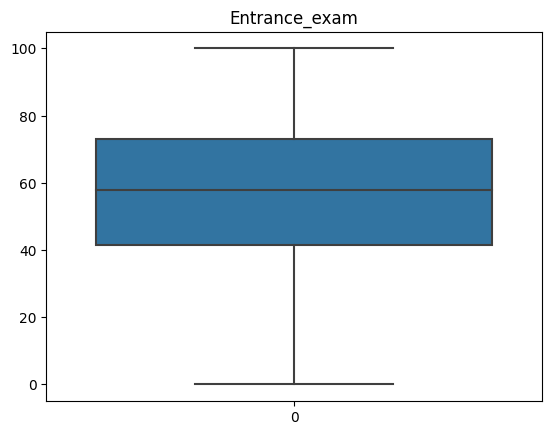

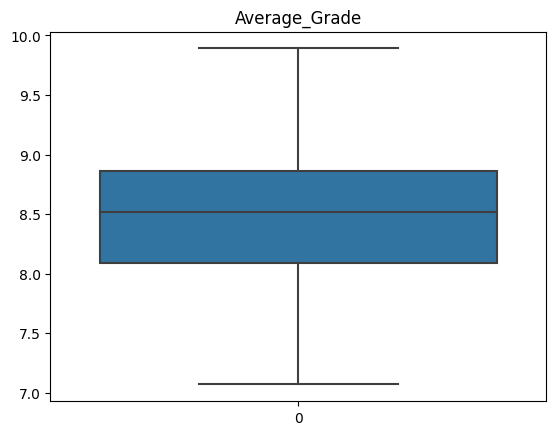

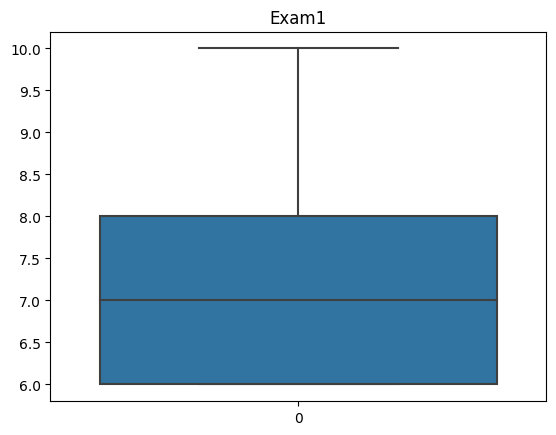

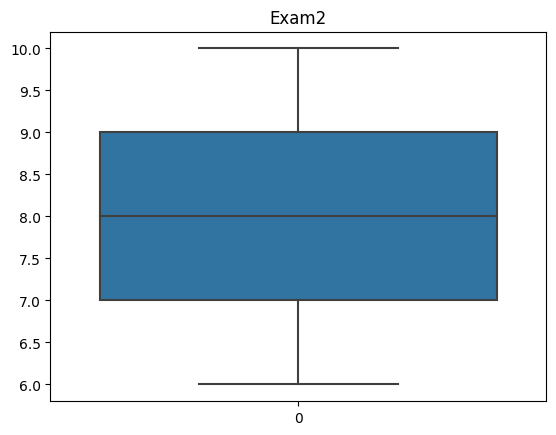

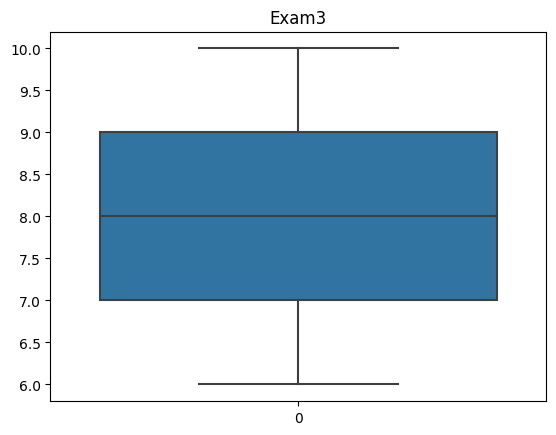

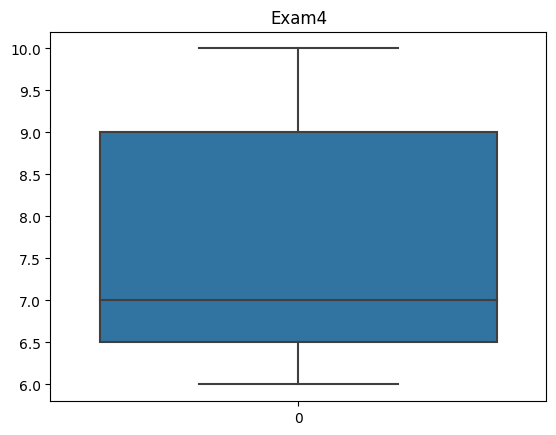

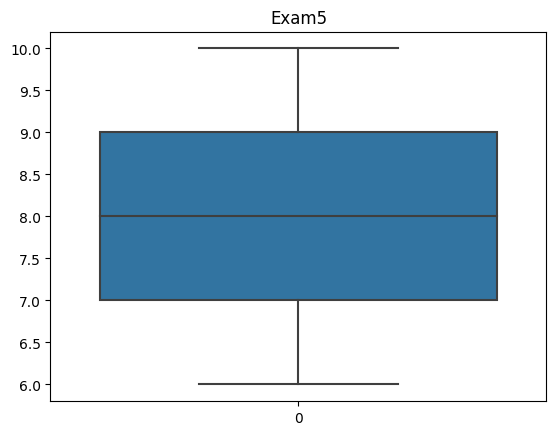

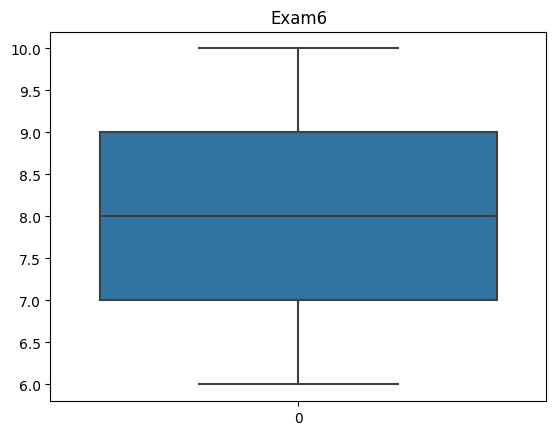

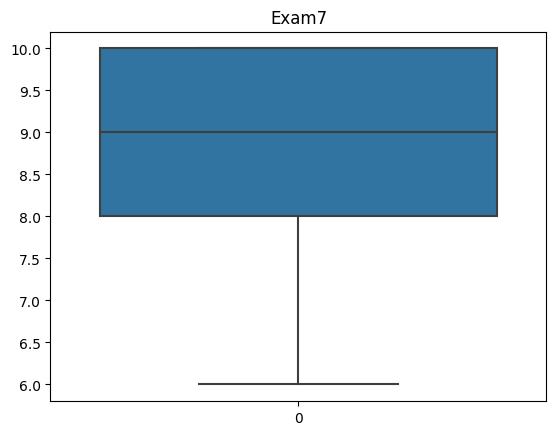

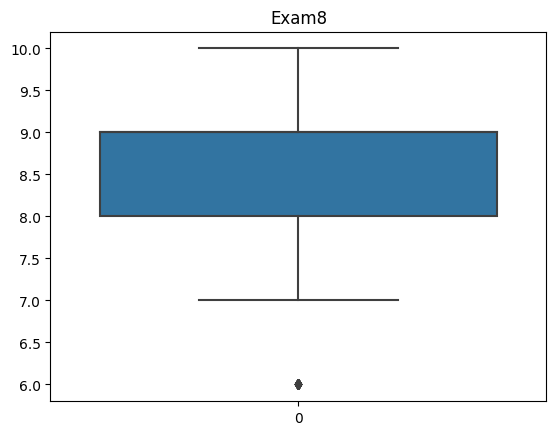

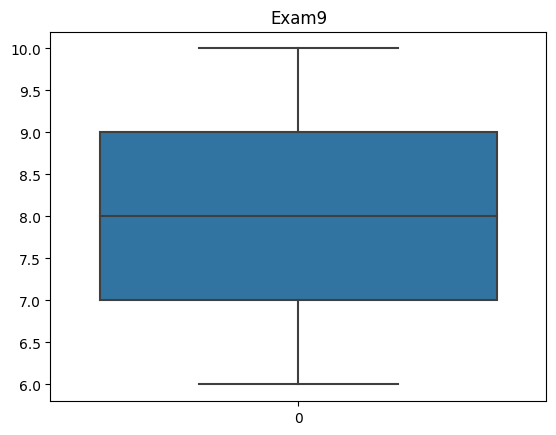

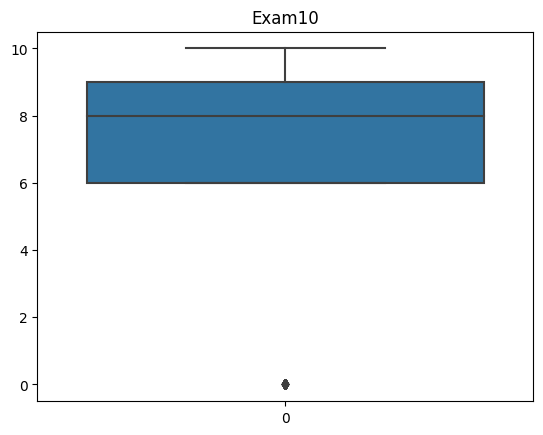

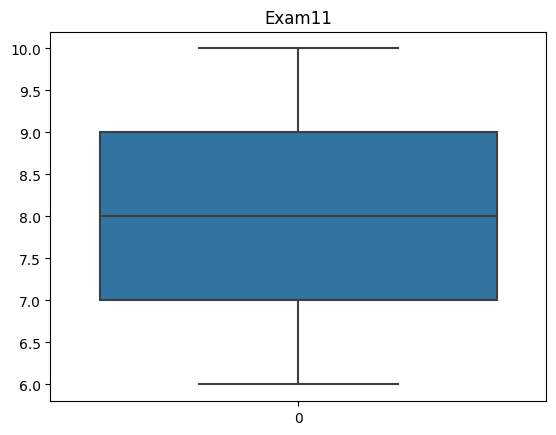

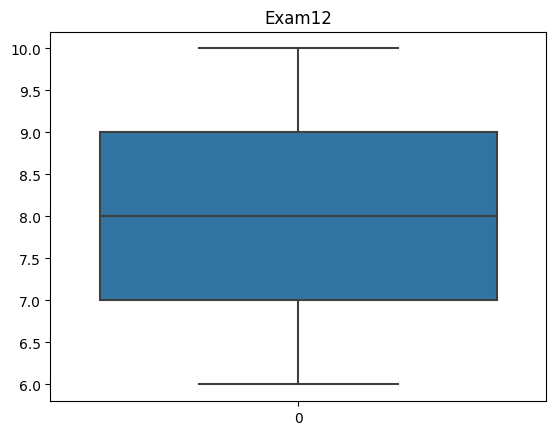

In [22]:
# เนื่องจากว่าข้อมูลของเรามีน้อย ผมคิดว่าเราอาจจะลองใช้ค่า mean หรือ median ในการไปแทนค่า NaN ใน column ที่เป็นพวก Exam (ซึ่งเป็นคะแนนและเป็นค่าเชิง Numerical)
# ผมจึงทำการใช้ boxplot เพื่อดูว่ามันมี outliers อย่างไรบ้าง

# Using Box Plot to see Outliers
for feature in Numerical_Columns:
    plt.title(feature,fontsize=12)
    sns.boxplot(df_clean[feature])
    plt.show()

In [23]:
# ซึ่งจะเห็นว่าแทบไม่มี outliers เลย หรือถ้ามีก็น่าจะเป็นเชิง true outliers ตามธรรมชาติและมีน้อยมาก จึงปล่อยไปได้
# ผมจึงคิดว่าเราน่าจะสามารถ replace ค่า NaN ด้วยค่า Mean ได้ครับ

# Calculate the mean value of each column
mean_values = df_clean.mean().round(1) # 1 decimal only
print(mean_values)

# Replace NaN values in each column with the corresponding mean value
df_clean = df_clean.fillna(mean_values)

Sex               0.4
Entrance_exam    56.0
Average_Grade     8.5
Exam1             7.2
Exam2             7.8
Exam3             7.9
Exam4             7.6
Exam5             8.0
Exam6             7.8
Exam7             8.6
Exam8             8.5
Exam9             8.1
Exam10            6.4
Exam11            8.0
Exam12            8.1
dtype: float64


In [24]:
# Print the resulting DataFrame
df_clean.head(5)

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
0,Good,0.0,100.0,8.66,Region_1,8.0,8.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0,0.0,7.0,7.0
1,Good,1.0,100.0,8.95,Region_2,8.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,8.1,10.0,8.0,8.0
2,Excellent,0.0,100.0,9.11,Region_3,9.0,9.0,9.0,7.0,8.0,7.0,8.0,9.0,7.0,0.0,9.0,9.0
3,Excellent,0.0,100.0,9.30,Region_2,9.0,10.0,10.0,9.0,8.0,7.0,10.0,9.0,8.1,10.0,9.0,9.0
4,Excellent,0.0,94.5,9.45,Region_2,7.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,8.1,10.0,8.0,8.0


In [25]:
# Checking Null values
print(df_clean.isnull().any())
print("\n")
print(df_clean.isnull().sum())

# No NULL VALUES

Student_success    False
Sex                False
Entrance_exam      False
Average_Grade      False
Region             False
Exam1              False
Exam2              False
Exam3              False
Exam4              False
Exam5              False
Exam6              False
Exam7              False
Exam8              False
Exam9              False
Exam10             False
Exam11             False
Exam12             False
dtype: bool


Student_success    0
Sex                0
Entrance_exam      0
Average_Grade      0
Region             0
Exam1              0
Exam2              0
Exam3              0
Exam4              0
Exam5              0
Exam6              0
Exam7              0
Exam8              0
Exam9              0
Exam10             0
Exam11             0
Exam12             0
dtype: int64


#**3) Apply and Compare K-Means and DBSCAN in terms of clustering performance**

<Axes: >

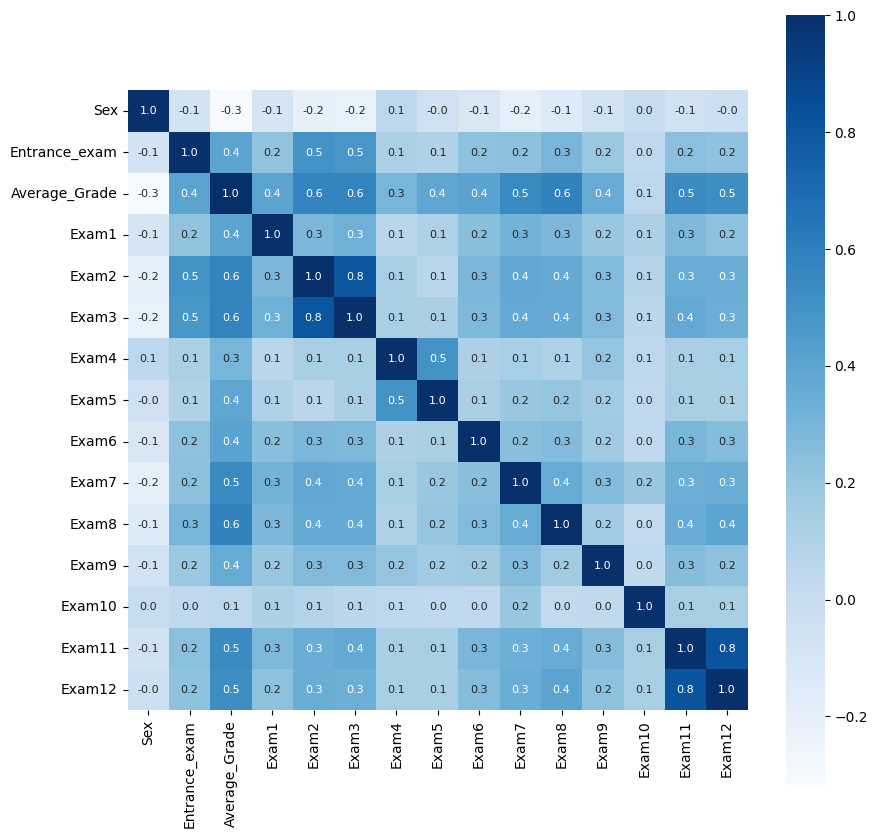

In [26]:
# Correlation
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df_clean.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

###**Label Encoding**

In [27]:
df_clean2 = df_clean.copy()

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_clean2["Region"] = encoder.fit_transform(df_clean2["Region"])
df_clean2["Student_success"] = encoder.fit_transform(df_clean2["Student_success"])

df_clean2.head(5)

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
0,2,0.0,100.0,8.66,0,8.0,8.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0,0.0,7.0,7.0
1,2,1.0,100.0,8.95,1,8.0,8.0,8.0,8.0,9.0,8.0,9.0,9.0,8.1,10.0,8.0,8.0
2,1,0.0,100.0,9.11,2,9.0,9.0,9.0,7.0,8.0,7.0,8.0,9.0,7.0,0.0,9.0,9.0
3,1,0.0,100.0,9.30,1,9.0,10.0,10.0,9.0,8.0,7.0,10.0,9.0,8.1,10.0,9.0,9.0
4,1,0.0,94.5,9.45,1,7.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,8.1,10.0,8.0,8.0


##**Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df_clean2.copy()

for _ in Numerical_Columns: df_scaled[_] = scaler.fit_transform(df_scaled[[_]])

In [29]:
df_scaled.head(5)

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12
0,2,0.0,1.000,0.563830,0,0.50,0.50,0.50,0.25,0.50,0.75,0.50,0.75,0.500,0.0,0.25,0.25
1,2,1.0,1.000,0.666667,1,0.50,0.50,0.50,0.50,0.75,0.50,0.75,0.75,0.525,1.0,0.50,0.50
2,1,0.0,1.000,0.723404,2,0.75,0.75,0.75,0.25,0.50,0.25,0.50,0.75,0.250,0.0,0.75,0.75
3,1,0.0,1.000,0.790780,1,0.75,1.00,1.00,0.75,0.50,0.25,1.00,0.75,0.525,1.0,0.75,0.75
4,1,0.0,0.945,0.843972,1,0.25,1.00,1.00,1.00,1.00,0.50,1.00,1.00,0.525,1.0,0.50,0.50


In [30]:
df_scaled.columns

Index(['Student_success', 'Sex', 'Entrance_exam', 'Average_Grade', 'Region',
       'Exam1', 'Exam2', 'Exam3', 'Exam4', 'Exam5', 'Exam6', 'Exam7', 'Exam8',
       'Exam9', 'Exam10', 'Exam11', 'Exam12'],
      dtype='object')

In [77]:
X = df_scaled[['Entrance_exam', 'Average_Grade']]

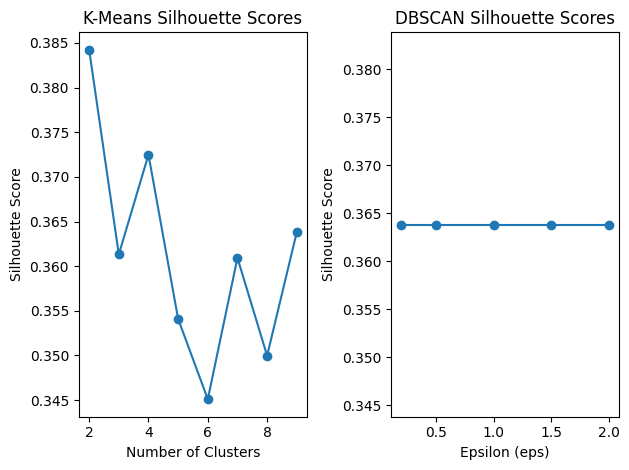

In [86]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Perform K-Means clustering by varying numbers of clusters
kmeans_scores = []
for clusters in range(2, 10):
    kmeans = KMeans(n_clusters=clusters, init = 'k-means++', random_state=69) # optimal K is 3 which means that 3 is going to give us the best values
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, kmeans_labels)
    kmeans_scores.append(silhouette_avg)

# Perform DBSCAN clustering by varying epsilon values
dbscan_scores = []
eps_values = [0.2, 0.5, 1.0, 1.5, 2.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    if len(np.unique(dbscan_labels)) > 1:  # Check if more than one cluster is formed
        silhouette_avg = silhouette_score(X, dbscan_labels)
    #else: silhouette_avg = 0.0  # Assign a score of 0 if only one cluster is formed
    dbscan_scores.append(silhouette_avg)

# Plot Silhouette Scores for K-Means
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), kmeans_scores, marker='o')
plt.title("K-Means Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

# Plot Silhouette Scores for DBSCAN
plt.subplot(1, 2, 2)
plt.plot(eps_values, dbscan_scores, marker='o')
plt.title("DBSCAN Silhouette Scores")
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

###**Using K-Means**

In [80]:
# เนื่องจาก K-Means จะมีค่า Silhouette Scores ที่สูงกว่า

km = KMeans(n_clusters=2, init = 'k-means++', random_state=69) # or n_clusters=4
Y_predicted = km.fit_predict(df_scaled[['Entrance_exam', 'Average_Grade']])
Y_predicted

df_km = df_scaled.copy()

In [81]:
df_km['cluster'] = Y_predicted
df_km.head()

,Student_success,Sex,Entrance_exam,Average_Grade,Region,Exam1,Exam2,Exam3,Exam4,Exam5,Exam6,Exam7,Exam8,Exam9,Exam10,Exam11,Exam12,cluster
0,2,0.0,1.000,0.563830,0,0.50,0.50,0.50,0.25,0.50,0.75,0.50,0.75,0.500,0.0,0.25,0.25,1
1,2,1.0,1.000,0.666667,1,0.50,0.50,0.50,0.50,0.75,0.50,0.75,0.75,0.525,1.0,0.50,0.50,1
2,1,0.0,1.000,0.723404,2,0.75,0.75,0.75,0.25,0.50,0.25,0.50,0.75,0.250,0.0,0.75,0.75,1
3,1,0.0,1.000,0.790780,1,0.75,1.00,1.00,0.75,0.50,0.25,1.00,0.75,0.525,1.0,0.75,0.75,1
4,1,0.0,0.945,0.843972,1,0.25,1.00,1.00,1.00,1.00,0.50,1.00,1.00,0.525,1.0,0.50,0.50,1


In [82]:
km.cluster_centers_

array([[0.38242775, 0.37904317],
       [0.71958549, 0.62003454]])

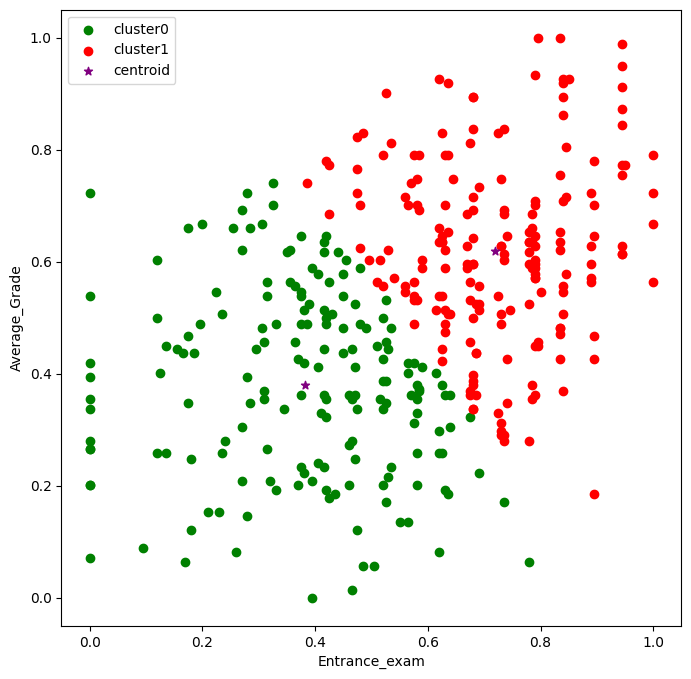

In [83]:
df1=df_km[df_km.cluster==0]
df2=df_km[df_km.cluster==1]
#df3=df_km[df_km.cluster==2]
#df4=df_km[df_km.cluster==3]

plt.figure(figsize=(8,8))
plt.scatter(df1.Entrance_exam, df1['Average_Grade'], color='green', label='cluster0')
plt.scatter(df2.Entrance_exam, df2['Average_Grade'], color='red', label='cluster1')
#plt.scatter(df3.Entrance_exam, df3['Average_Grade'], color='blue', label='cluster2')
#plt.scatter(df4.Entrance_exam, df4['Average_Grade'], color='yellow', label='cluster3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Entrance_exam')
plt.ylabel('Average_Grade')
plt.legend()

In [85]:
df_km[["Entrance_exam","Average_Grade","cluster"]].groupby('cluster').describe().T.head(20)

cluster                       0           1
Entrance_exam count  173.000000  193.000000
              mean     0.382428    0.719585
              std      0.174586    0.132323
              min      0.000000    0.385000
              25%      0.280000    0.630000
              50%      0.410000    0.730000
              75%      0.520000    0.800000
              max      0.780000    1.000000
Average_Grade count  173.000000  193.000000
              mean     0.379043    0.620035
              std      0.167780    0.164265
              min      0.000000    0.184397
              25%      0.258865    0.514184
              50%      0.372340    0.617021
              75%      0.500000    0.723404
              max      0.741135    1.000000